In [1]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

# 1. import & 한글설정 & 경고메세지(warning) ignore

In [42]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# seaborn 스타일 설정
sns.set(style='white', rc={'figure.figsize':(20,5)})
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본으로 하려면
import matplotlib.font_manager as fm
font_file = 'C:/Windows/Fonts/H2MJRE.TTF'
font_name = fm.FontProperties(fname=font_file,size=20).get_name()
plt.rc('font', family=font_name)

# warning(경고) 안보이게
import warnings
#warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore') # 경고 메세지 무시

# 2. 서울과 부산데이터만 df 변수에 

In [5]:
%ls "C:/ai_x/download/shareData/상가정보_20250331/"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3664-591E

 C:\ai_x\download\shareData\상가정보_20250331 디렉터리

2025-04-28  오후 03:51    <DIR>          .
2025-04-28  오후 03:51    <DIR>          ..
2025-04-27  오후 11:07             1,011 [필독]파일열람방법.txt
2025-04-27  오후 11:07        61,227,944 소상공인시장진흥공단_상가(상권)정보_강원_202503.csv
2025-04-27  오후 11:07       356,572,082 소상공인시장진흥공단_상가(상권)정보_경기_202503.csv
2025-04-27  오후 11:07        93,472,559 소상공인시장진흥공단_상가(상권)정보_경남_202503.csv
2025-04-27  오후 11:07        76,425,275 소상공인시장진흥공단_상가(상권)정보_경북_202503.csv
2025-04-27  오후 11:07        40,070,868 소상공인시장진흥공단_상가(상권)정보_광주_202503.csv
2025-04-27  오후 11:07        61,715,005 소상공인시장진흥공단_상가(상권)정보_대구_202503.csv
2025-04-27  오후 11:07        41,491,092 소상공인시장진흥공단_상가(상권)정보_대전_202503.csv
2025-04-27  오후 11:07        84,550,600 소상공인시장진흥공단_상가(상권)정보_부산_202503.csv
2025-04-27  오후 11:07       294,549,483 소상공인시장진흥공단_상가(상권)정보_서울_202503.csv
2025-04-27  오후 11:07         9,303,432 소상공인시장진흥공단_상가(상권)정보_세종_202503.csv
2025-04-27  오후 11:07        28,457,489 

In [6]:
# 서울 소상공인 데이터
df_sl = pd.read_csv('C:/ai_x/download/shareData/상가정보_20250331/소상공인시장진흥공단_상가(상권)정보_서울_202503.csv',
                   encoding='utf-8',
                   sep=',',
                   low_memory=False
                   )
df_sl.shape

(540517, 39)

In [7]:
# 부산 소상공인 데이터
df_bsn = pd.read_csv('C:/ai_x/download/shareData/상가정보_20250331/소상공인시장진흥공단_상가(상권)정보_부산_202503.csv',
                   encoding='utf-8',
                   sep=',',
                   low_memory=False
                   )
df_bsn.shape

(155537, 39)

In [8]:
all(df_sl.columns==df_bsn.columns)

True

In [11]:
df = pd.concat([df_sl, df_bsn])
df.tail().T

,155532,155533,155534,155535,155536
상가업소번호,MA0101202502A0111400,MA0101202502A0114219,MA0101202502A0114732,MA0101202502A0114738,MA0101202502A0114753
상호명,포마크파티룸,정옥농장,지안영어교습소,히어로스포츠,안목
지점명,NaN,NaN,NaN,NaN,부산역점
상권업종대분류코드,G2,G2,P1,P1,I2
상권업종대분류명,소매,소매,교육,교육,음식
상권업종중분류코드,G220,G204,P105,P106,I201
상권업종중분류명,애완동물·용품 소매,종합 소매,일반 교육,기타 교육,한식
상권업종소분류코드,G22001,G20404,P10501,P10603,I20101
상권업종소분류명,애완동물/애완용품 소매업,슈퍼마켓,입시·교과학원,요가/필라테스 학원,백반/한정식
표준산업분류코드,G47852,G47129,P85501,P85612,I56111


In [12]:
df.loc[0,['상호명','상권업종대분류명']]

,상호명,상권업종대분류명
0,부동산임대김은숙,음식
0,경희윤한의원,보건의료


In [13]:
df.reset_index(drop=True, inplace=True)
df.loc[0,['상호명','상권업종대분류명']]

상호명         부동산임대김은숙
상권업종대분류명          음식
Name: 0, dtype: object

In [14]:
df.index

RangeIndex(start=0, stop=696054, step=1)

In [ ]:
# 현재 주피터 노트북이 쓰고 있는 메모리 용량
# pip install memory_profiler

In [15]:
%load_ext memory_profiler
%memit

peak memory: 1231.01 MiB, increment: 0.14 MiB


In [16]:
del df_sl, df_bsn

In [17]:
%load_ext memory_profiler
%memit

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 1018.59 MiB, increment: 0.00 MiB


# 3. 결측치 확인 및 시각화
- missingno 라이브러리, https://github.com/ResidentMario/missingno
- matplotlib
## (0) missingno 라이브러리로 결측치 시각화
- pip install missingno

<Axes: >

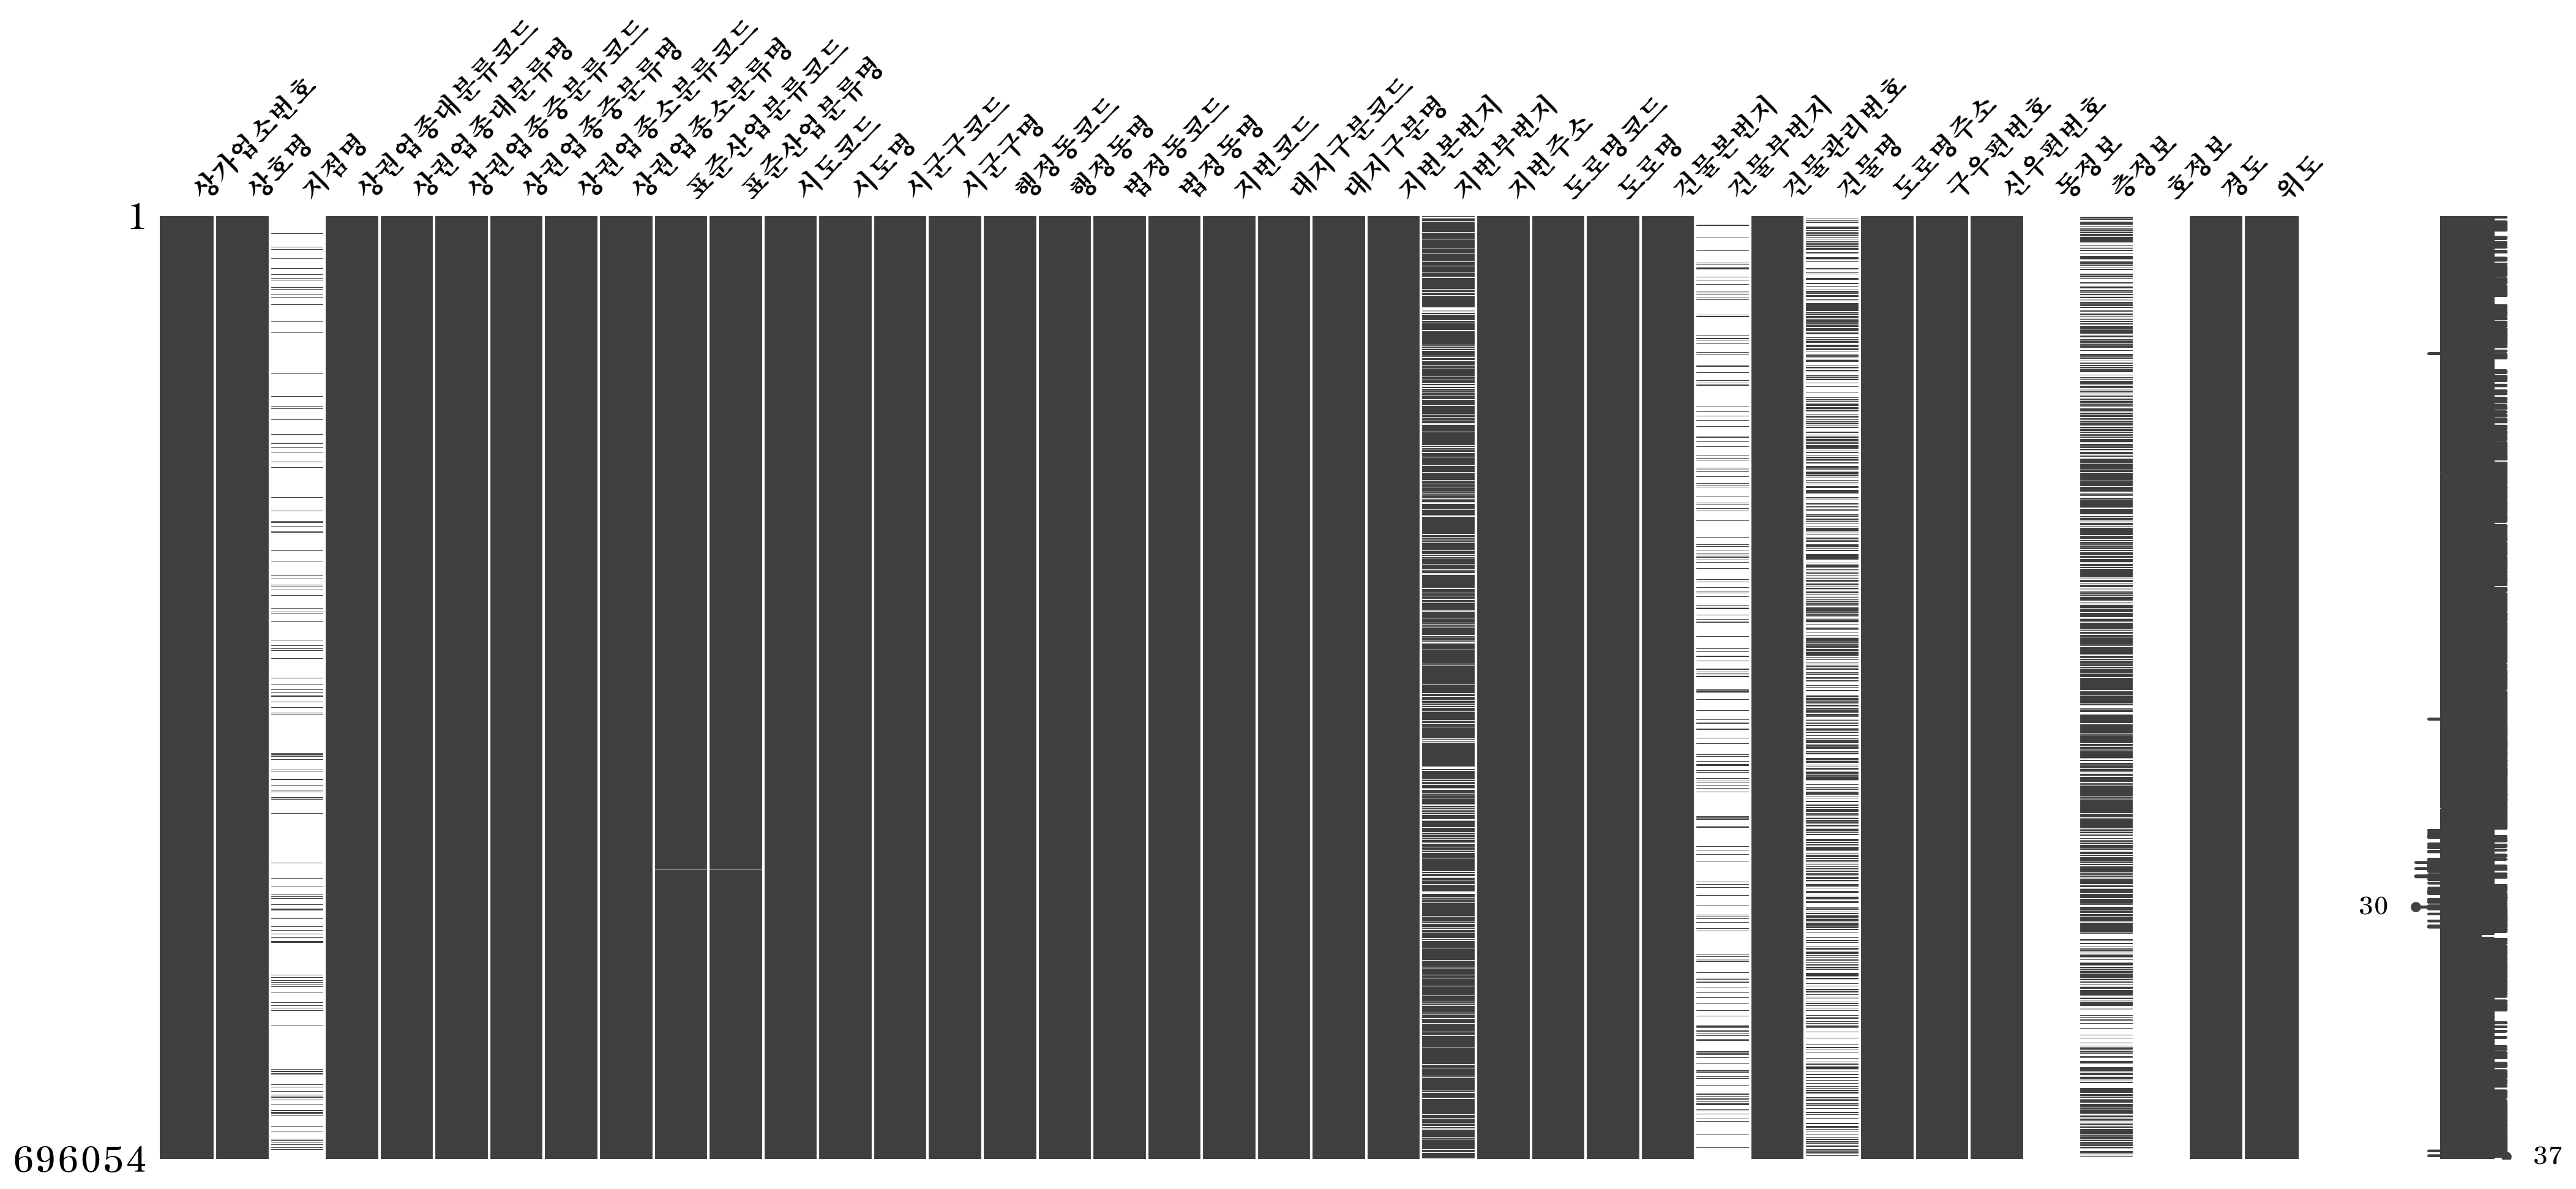

In [19]:
import missingno as msno
msno.matrix(df) # 결측치가 없는 부분은 검정색. 결측치 부분은 하얀색

<Axes: >

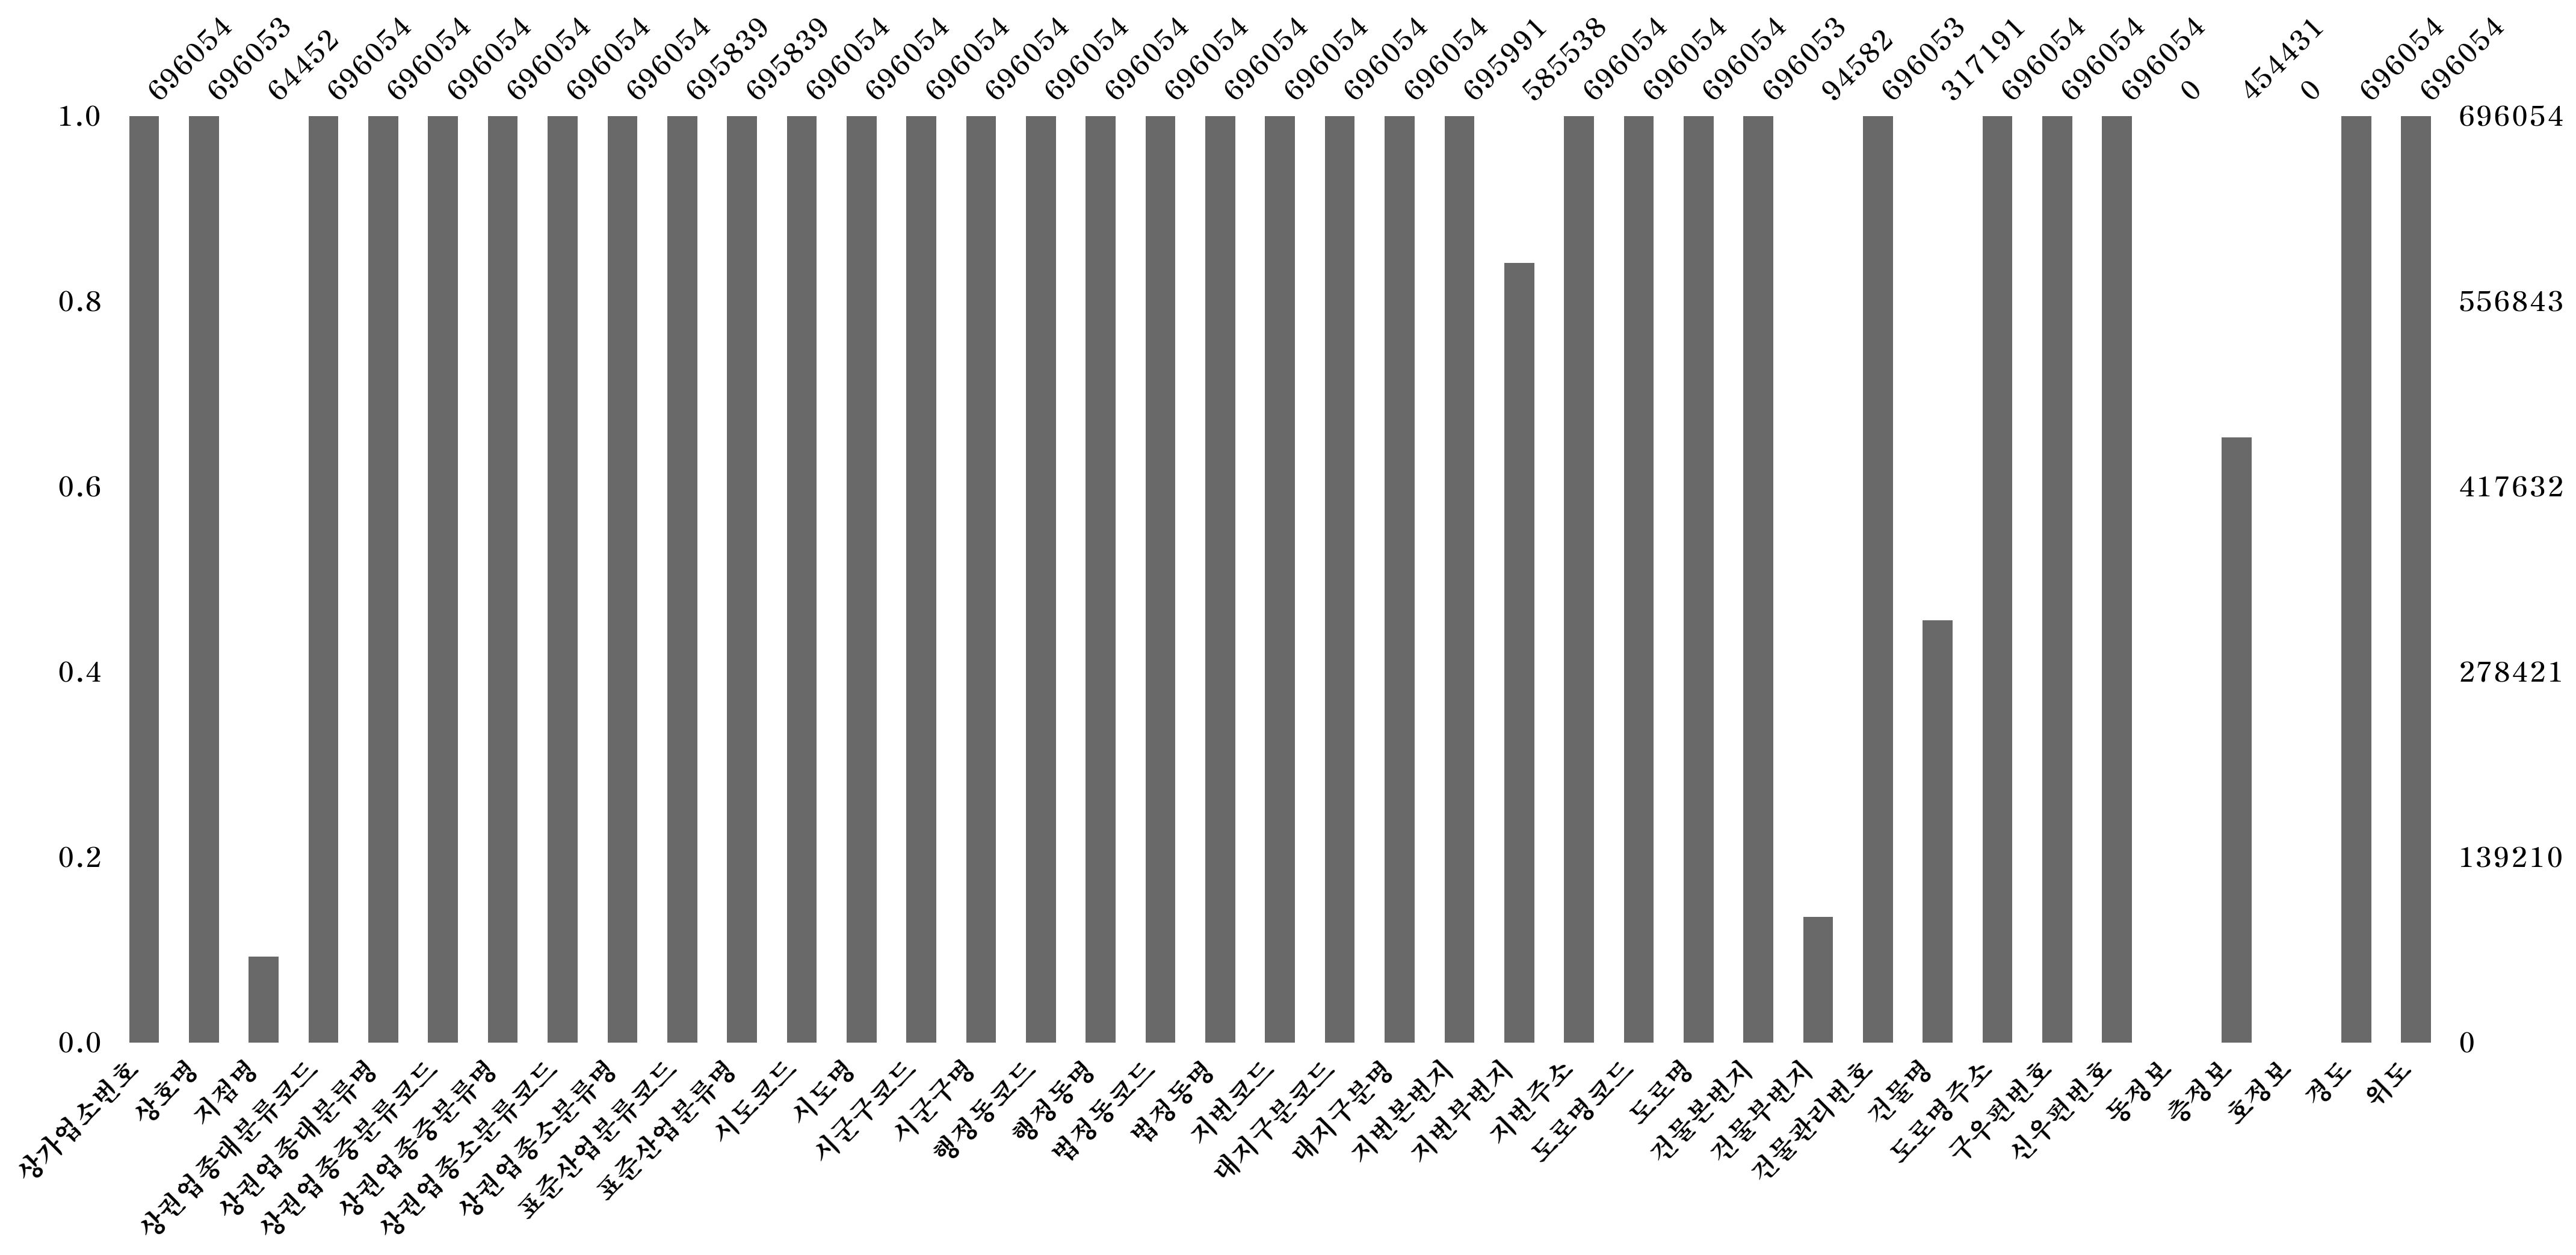

In [20]:
msno.bar(df) # 결측치가 아닌 데이터 갯수

<Axes: >

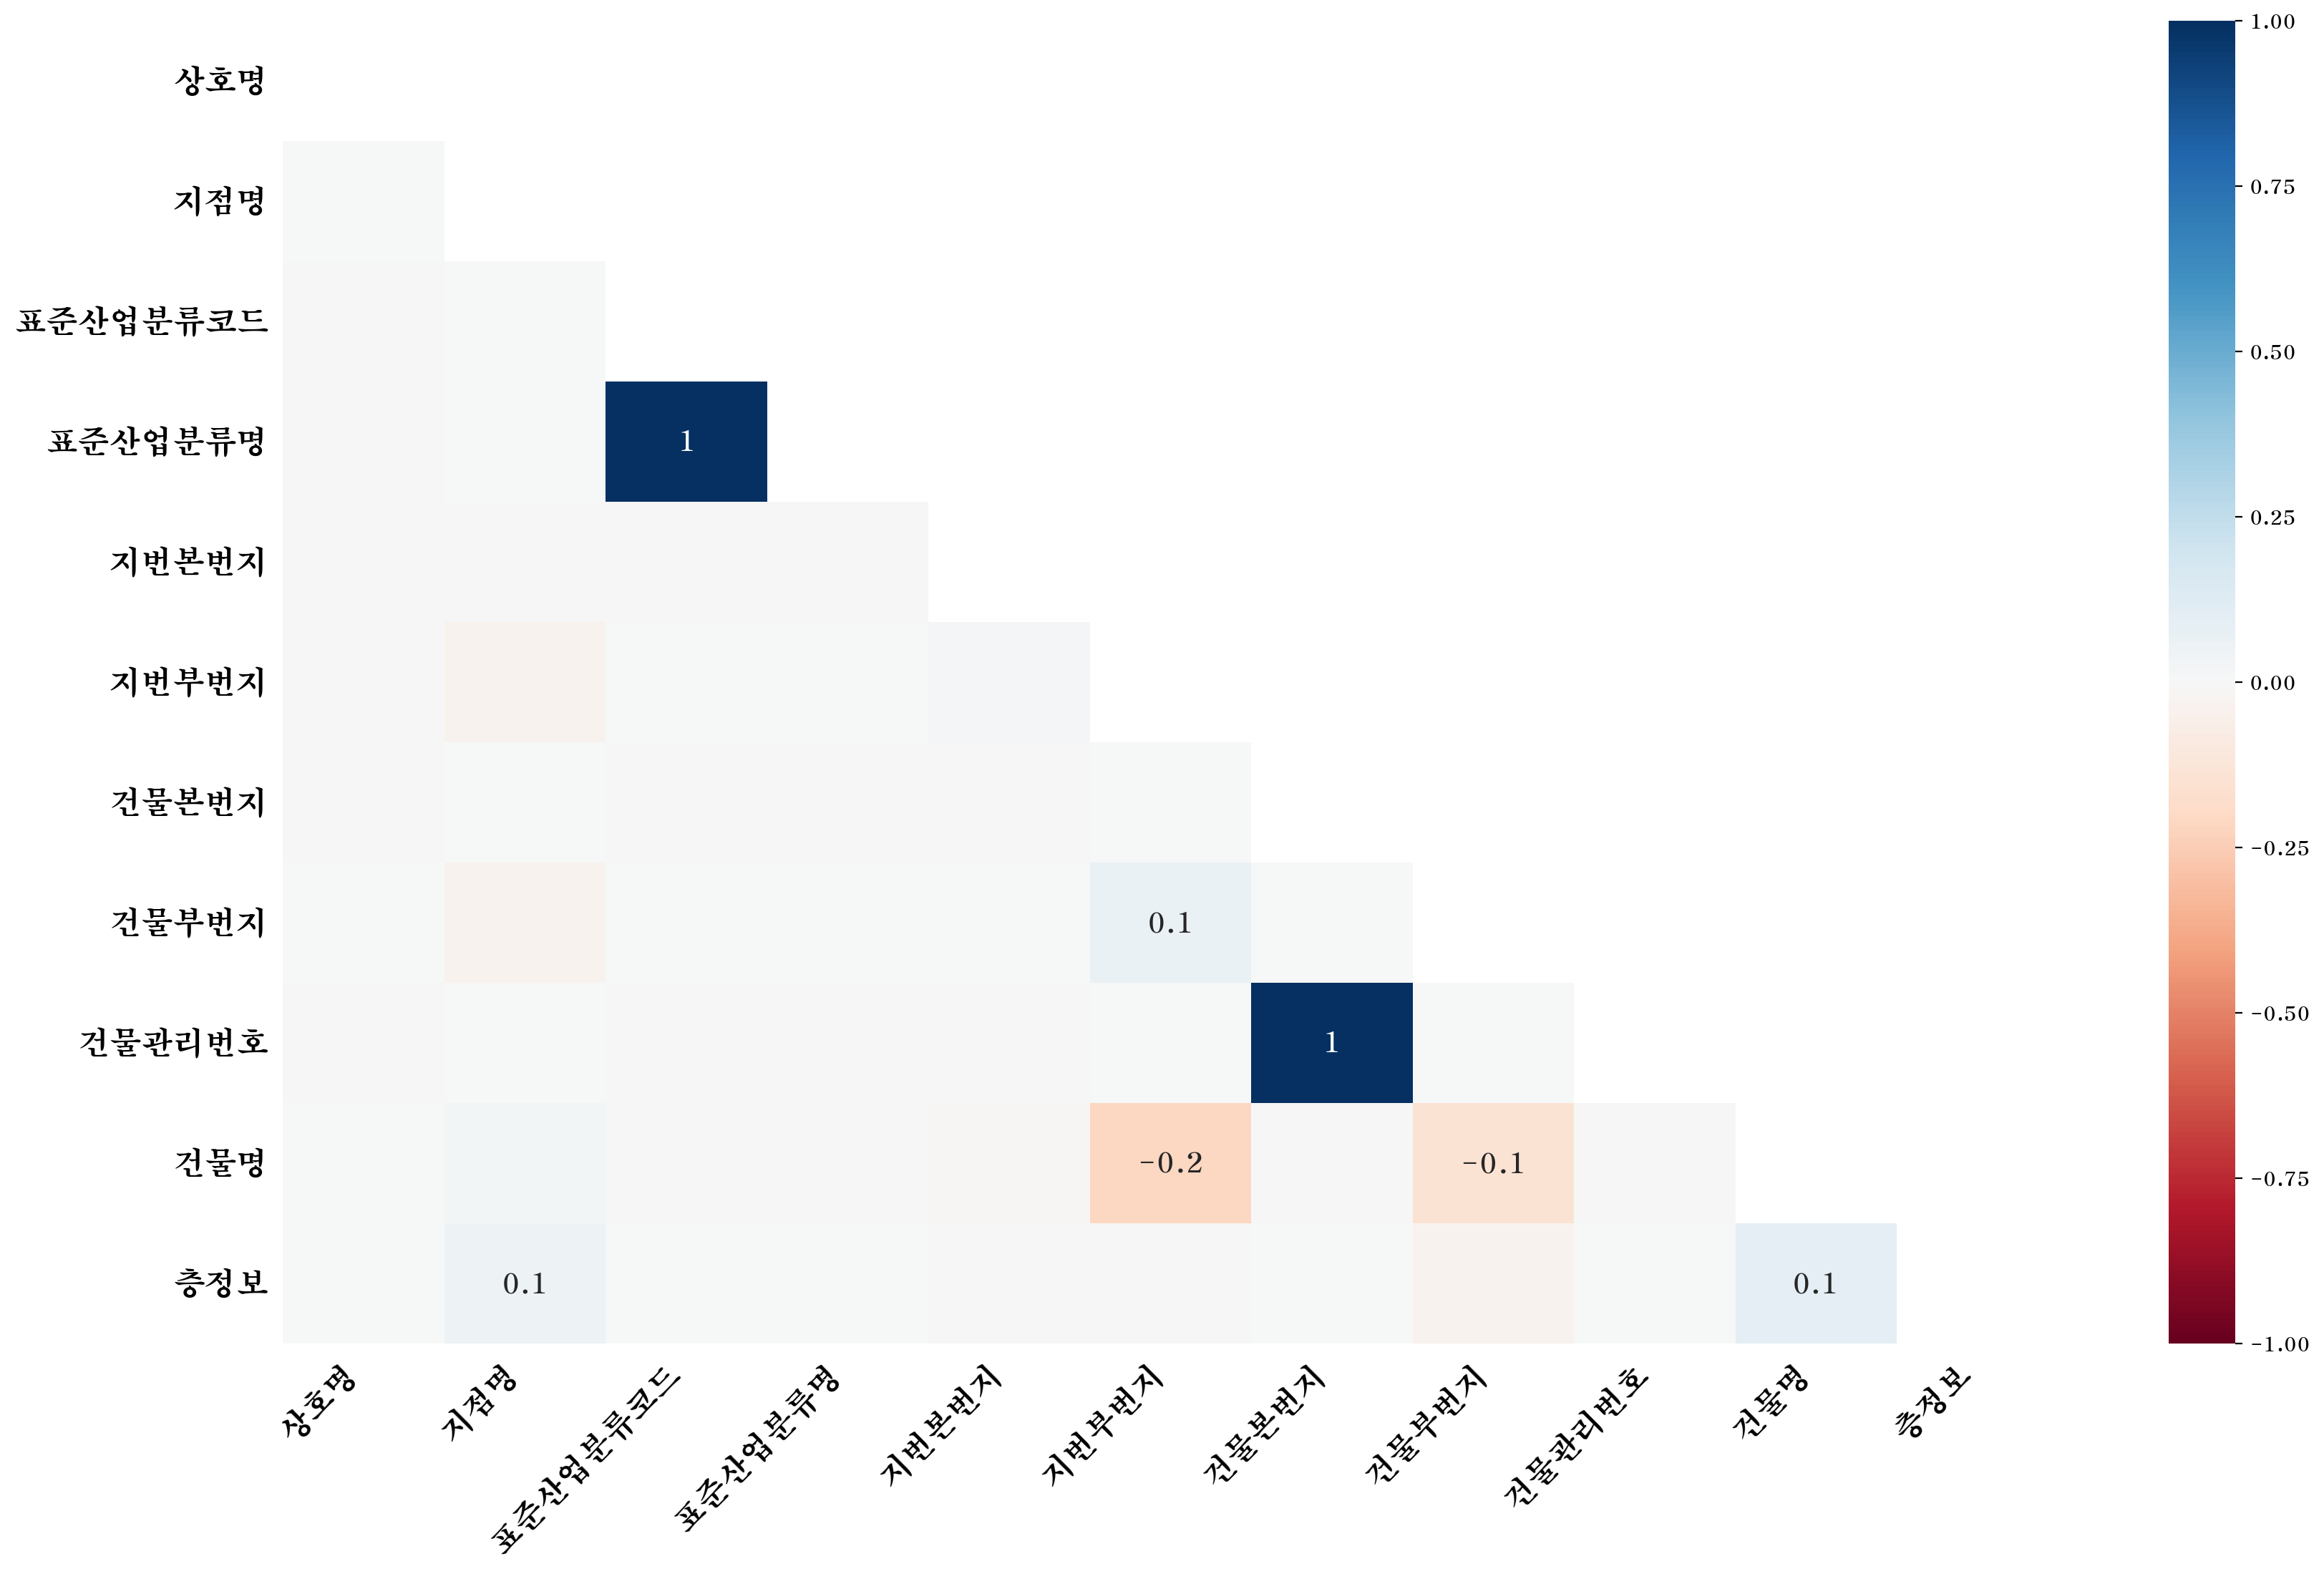

In [21]:
msno.heatmap(df)

<Axes: >

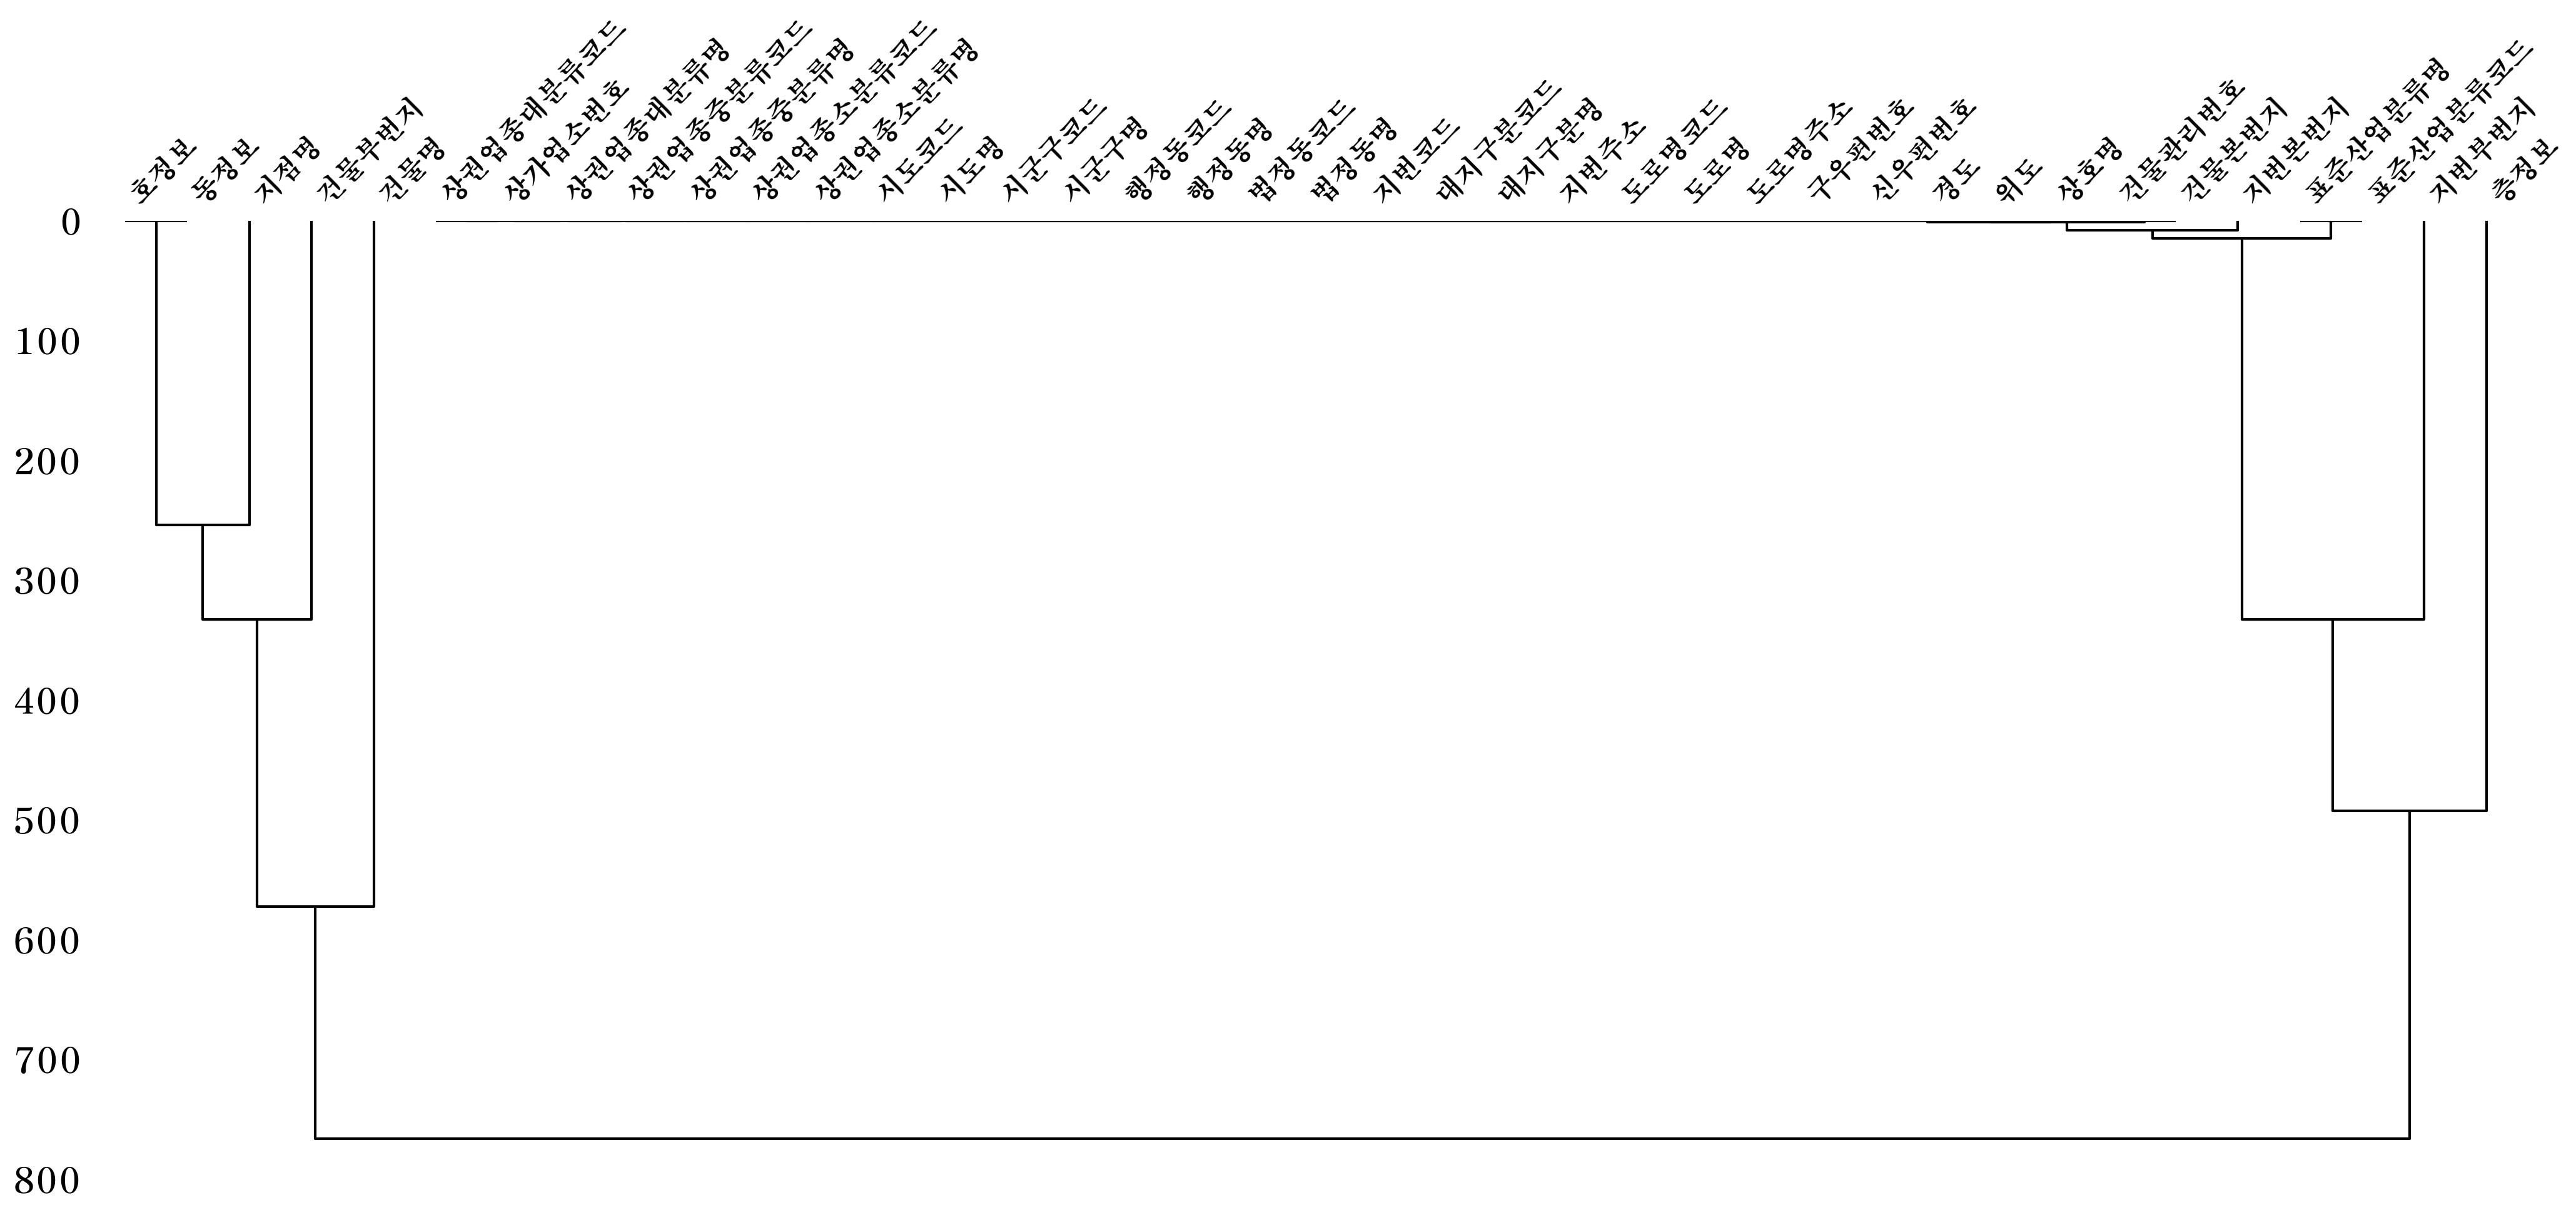

In [22]:
# 결측치가 있는 컬럼끼리 그룹화
msno.dendrogram(df)

## ① df 변수의 컬럼들을 확인하고 상위 3줄, 하위3줄을 출력한다

In [25]:
df.head(3)
df.tail(3)
df.iloc[-3:,:]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
696051,MA0101202502A0114732,지안영어교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,2635010700114850004026754,대승프라임,부산광역시 해운대구 세실로 31,612842,48111,NaN,NaN,NaN,129.179075,35.167826
696052,MA0101202502A0114738,히어로스포츠,NaN,P1,교육,P106,기타 교육,P10603,요가/필라테스 학원,P85612,...,2653010600100740025010100,NaN,부산광역시 사상구 가야대로366번길 22,617833,47006,NaN,3,NaN,129.012518,35.150000
696053,MA0101202502A0114753,안목,부산역점,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,2617010100112000004006724,NaN,부산광역시 동구 중앙대로214번길 3-10,601838,48733,NaN,1,NaN,129.041453,35.116696


## ②	df 변수의 결측치를 제외한 데이터 개수 및 dtype들을 출력(dtypes함수)하고 변수가 사용되는 메모리 사용량 확인

In [27]:
df.dtypes

상가업소번호        object
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지        float64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지        float64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호          int64
동정보          float64
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

## ③	결측치를 확인하고 결측치가 없는 컬럼을 포함하여 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot)

In [28]:
missing_cnt = df.isnull().sum()
missing_cnt

상가업소번호            0
상호명               1
지점명          631602
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드        215
표준산업분류명         215
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지            63
지번부번지        110516
지번주소              0
도로명코드             0
도로명               0
건물본번지             1
건물부번지        601472
건물관리번호            1
건물명          378863
도로명주소             0
구우편번호             0
신우편번호             0
동정보          696054
층정보          241623
호정보          696054
경도                0
위도                0
dtype: int64

<Axes: >

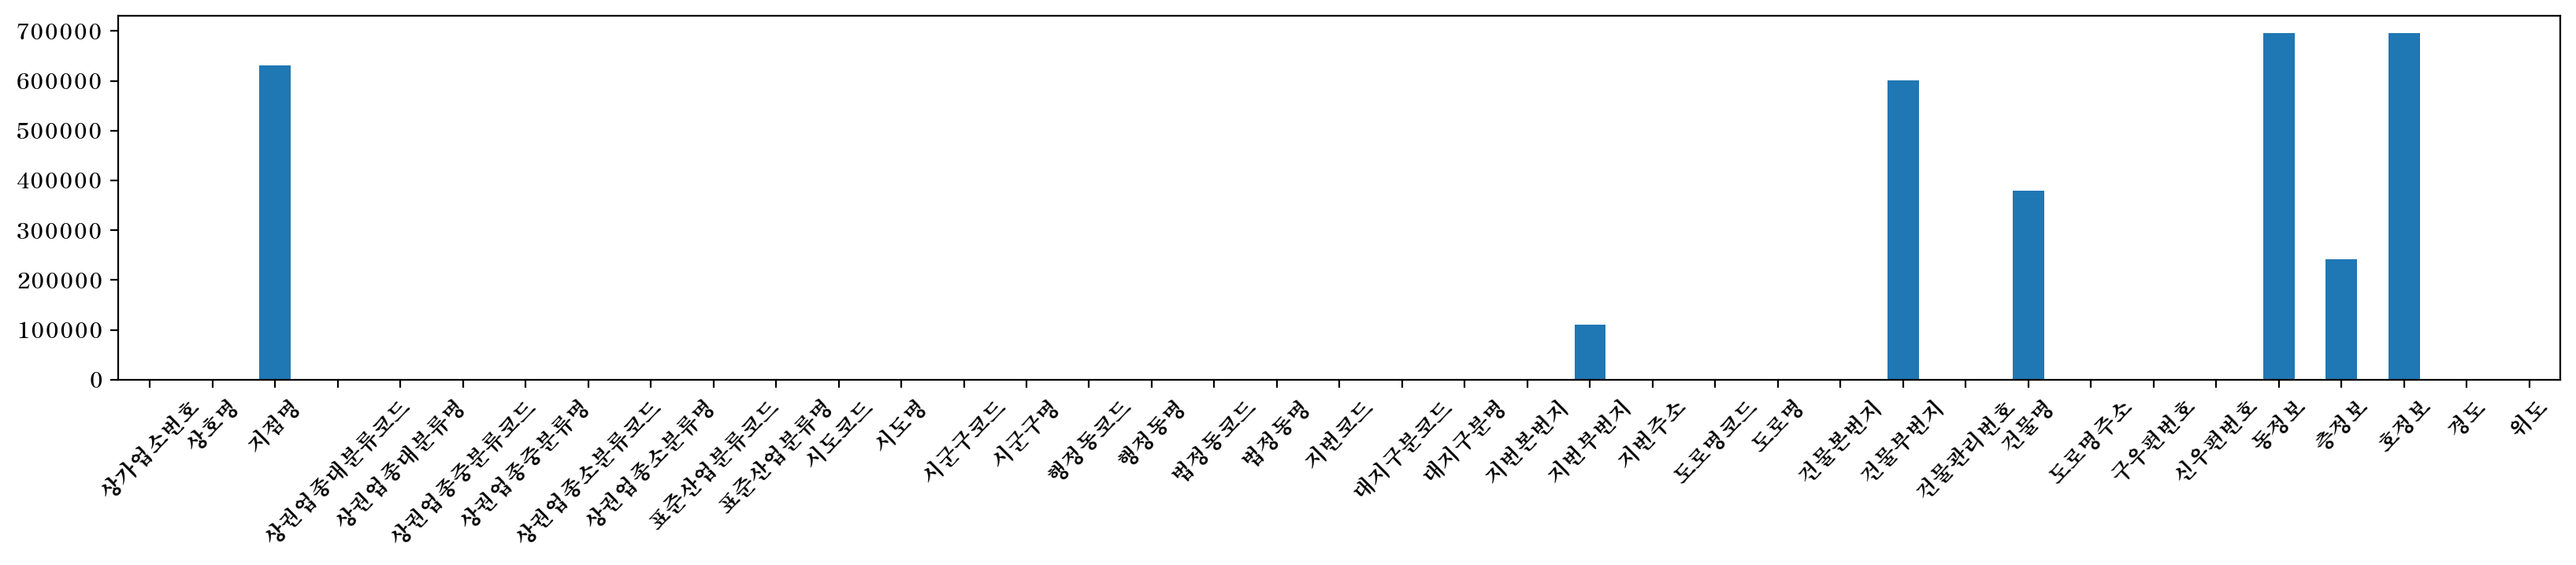

In [29]:
missing_cnt.plot.bar(figsize=(20,3), rot=45)

<Axes: >

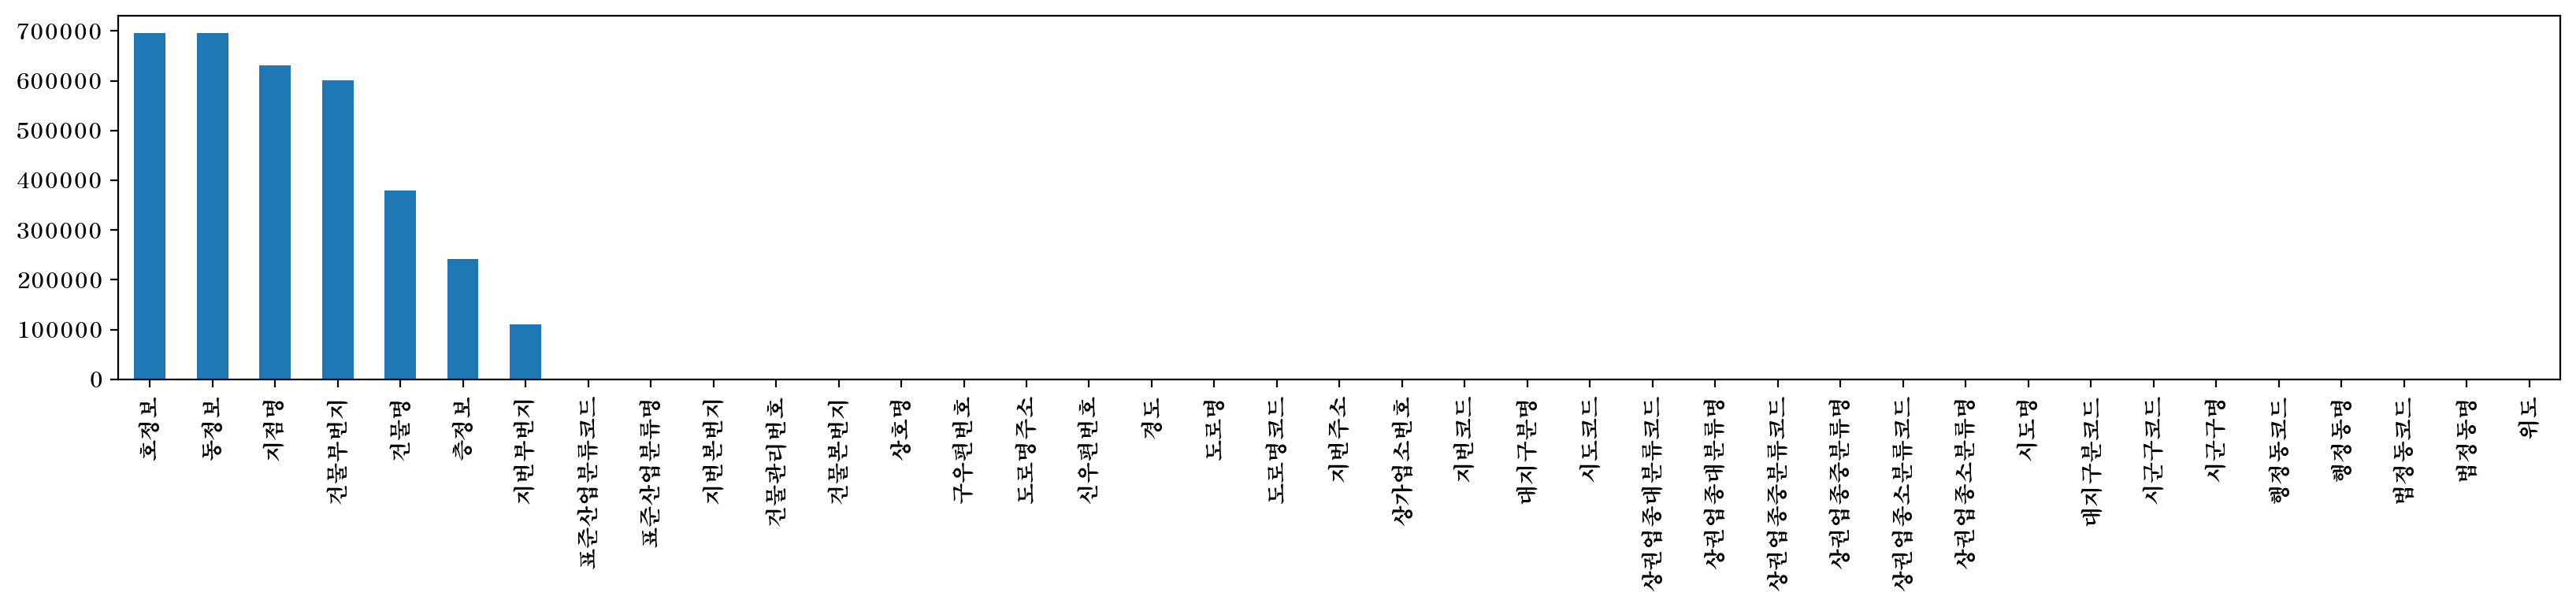

In [30]:
missing_cnt_srtd = missing_cnt.sort_values(ascending=False)
missing_cnt_srtd.plot(kind='bar',figsize=(20,3))

<Axes: >

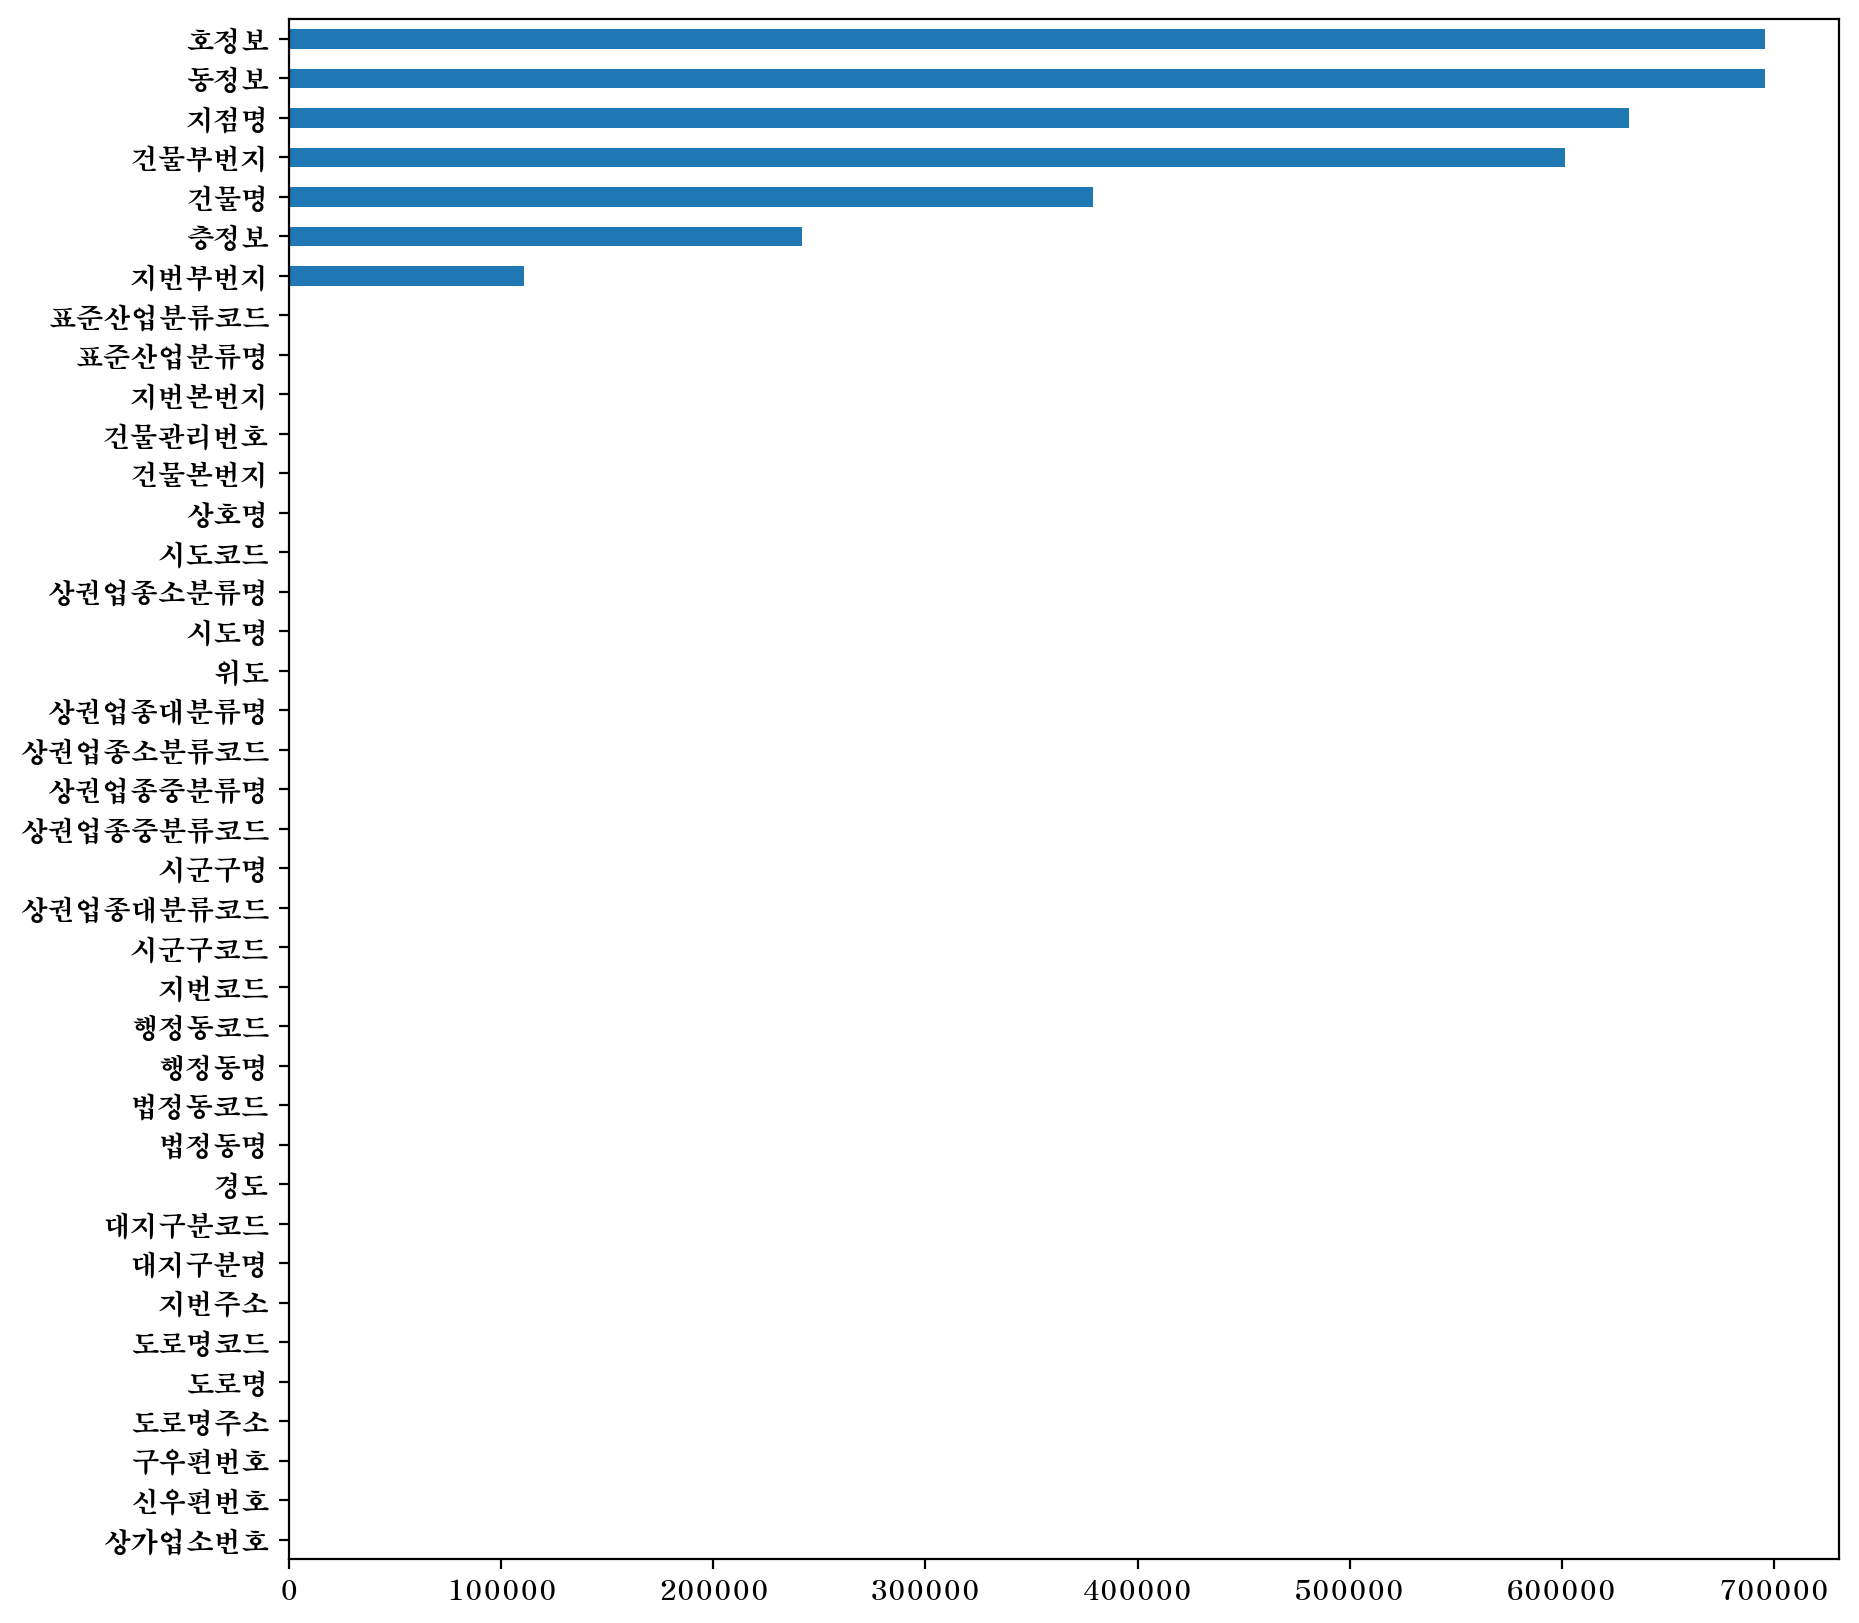

In [31]:
missing_cnt_srtd = missing_cnt.sort_values(ascending=True)
missing_cnt_srtd.plot(kind='barh',figsize=(10,10))

## ④	결측치가 없는 컬럼는 제외하고 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot).

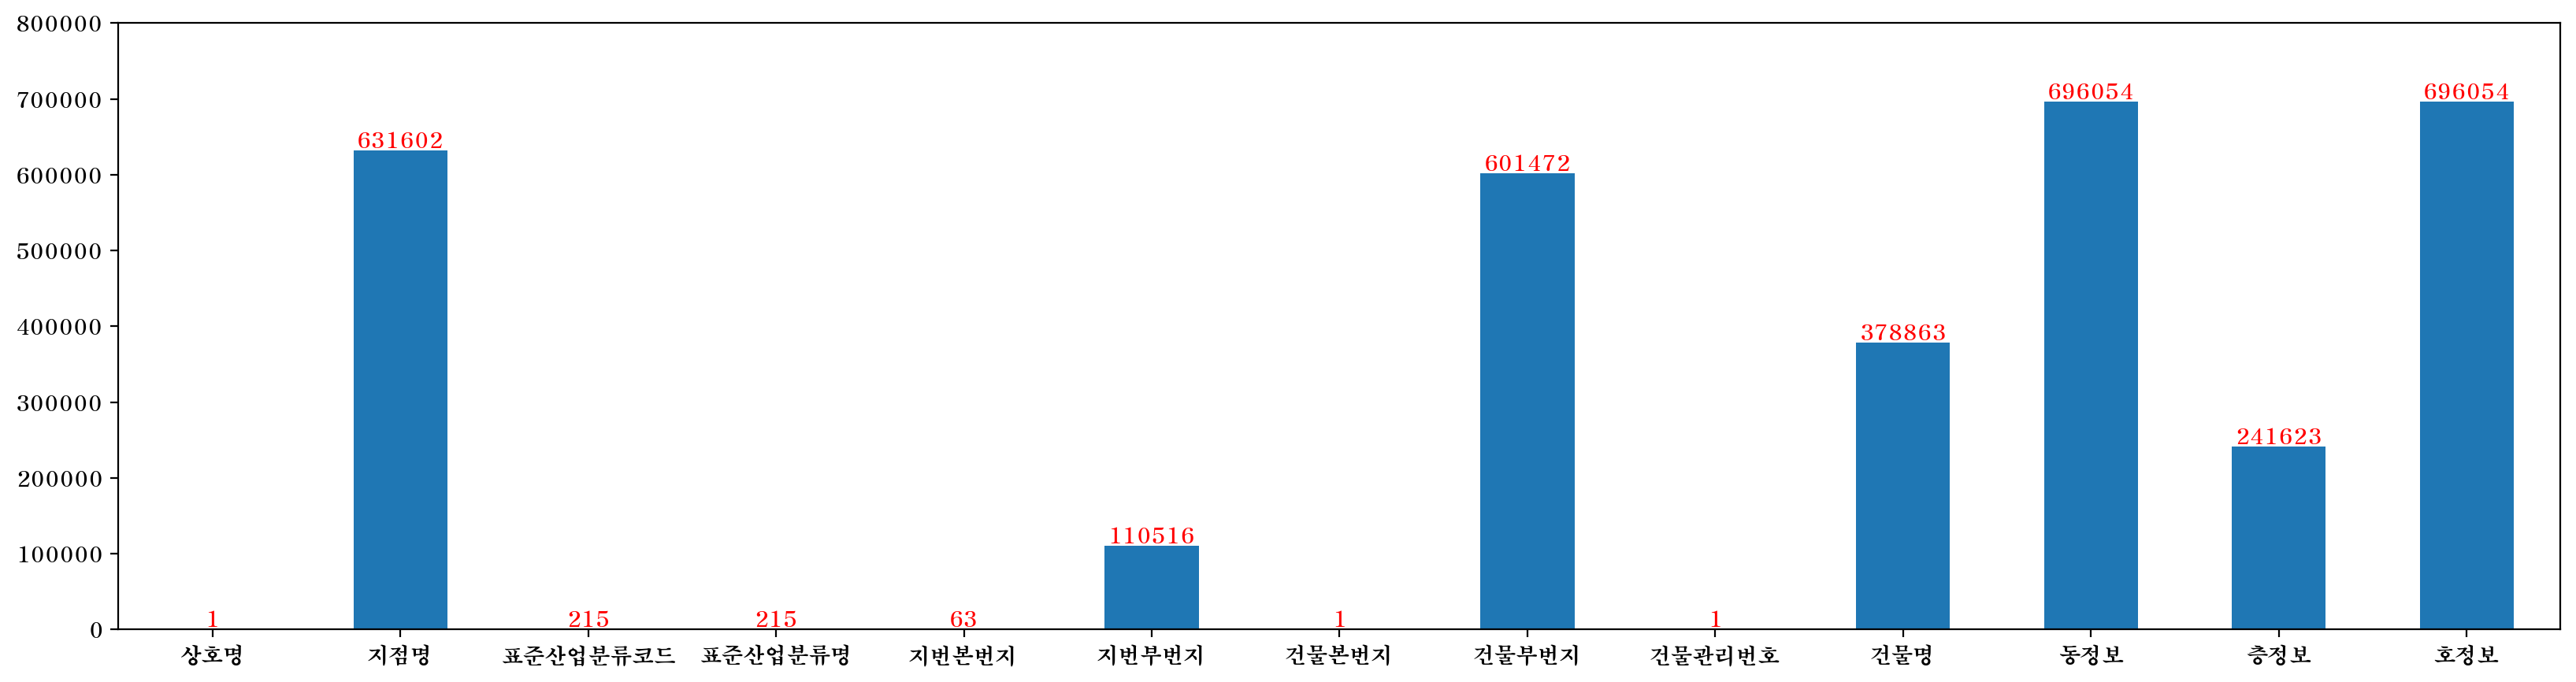

In [41]:
only_missing_cnt = missing_cnt[missing_cnt!=0]
only_missing_cnt.plot.bar(figsize=(20,5), 
                          rot=0,
                          ylim=[0,800000])
for idx, val in enumerate(only_missing_cnt):
    plt.text(idx,val,val, size=10, color='r', weight='bold', va='bottom', ha='center')

(0.0, 800000.0)

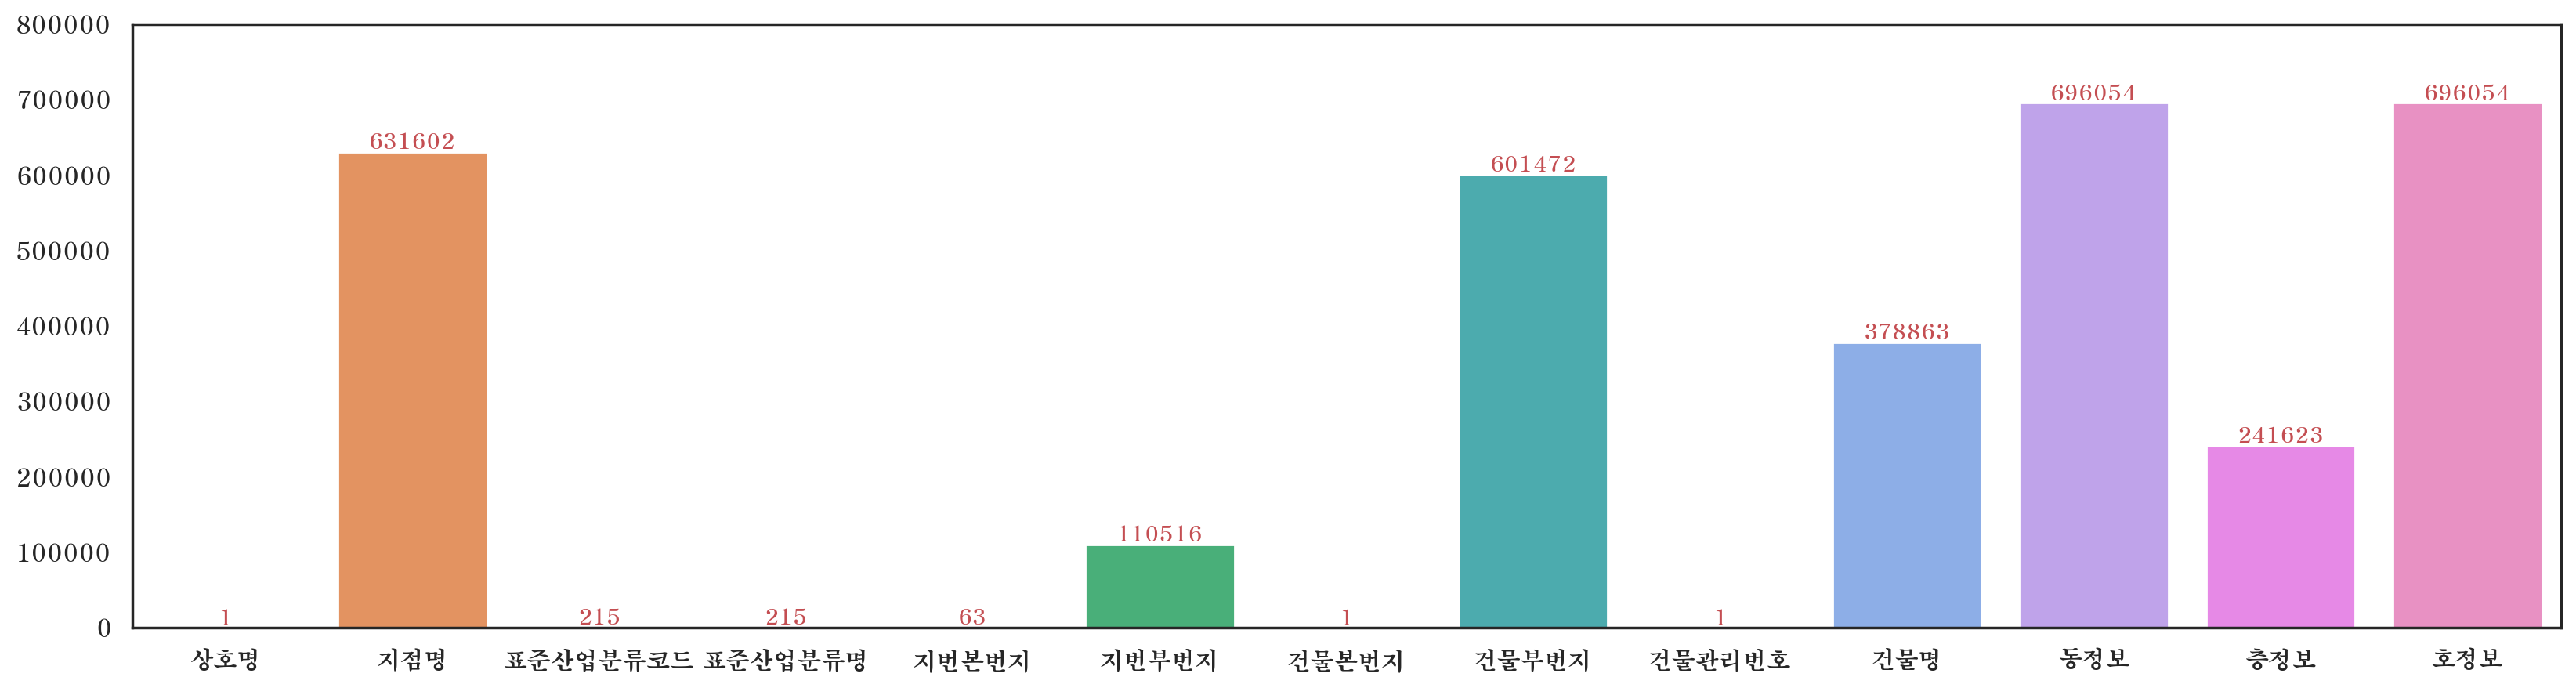

In [45]:
g=sns.barplot(data=only_missing_cnt.to_frame(), x=only_missing_cnt.index, y=only_missing_cnt)
for idx, val in enumerate(only_missing_cnt):
    plt.text(idx,val,val, size=10, color='r', weight='bold', va='bottom', ha='center')
g.set_ylim([0,800000])   # or plt.ylim([0,800000]) 
plt.show()

Text(0.5, 1.0, '결측치갯수')

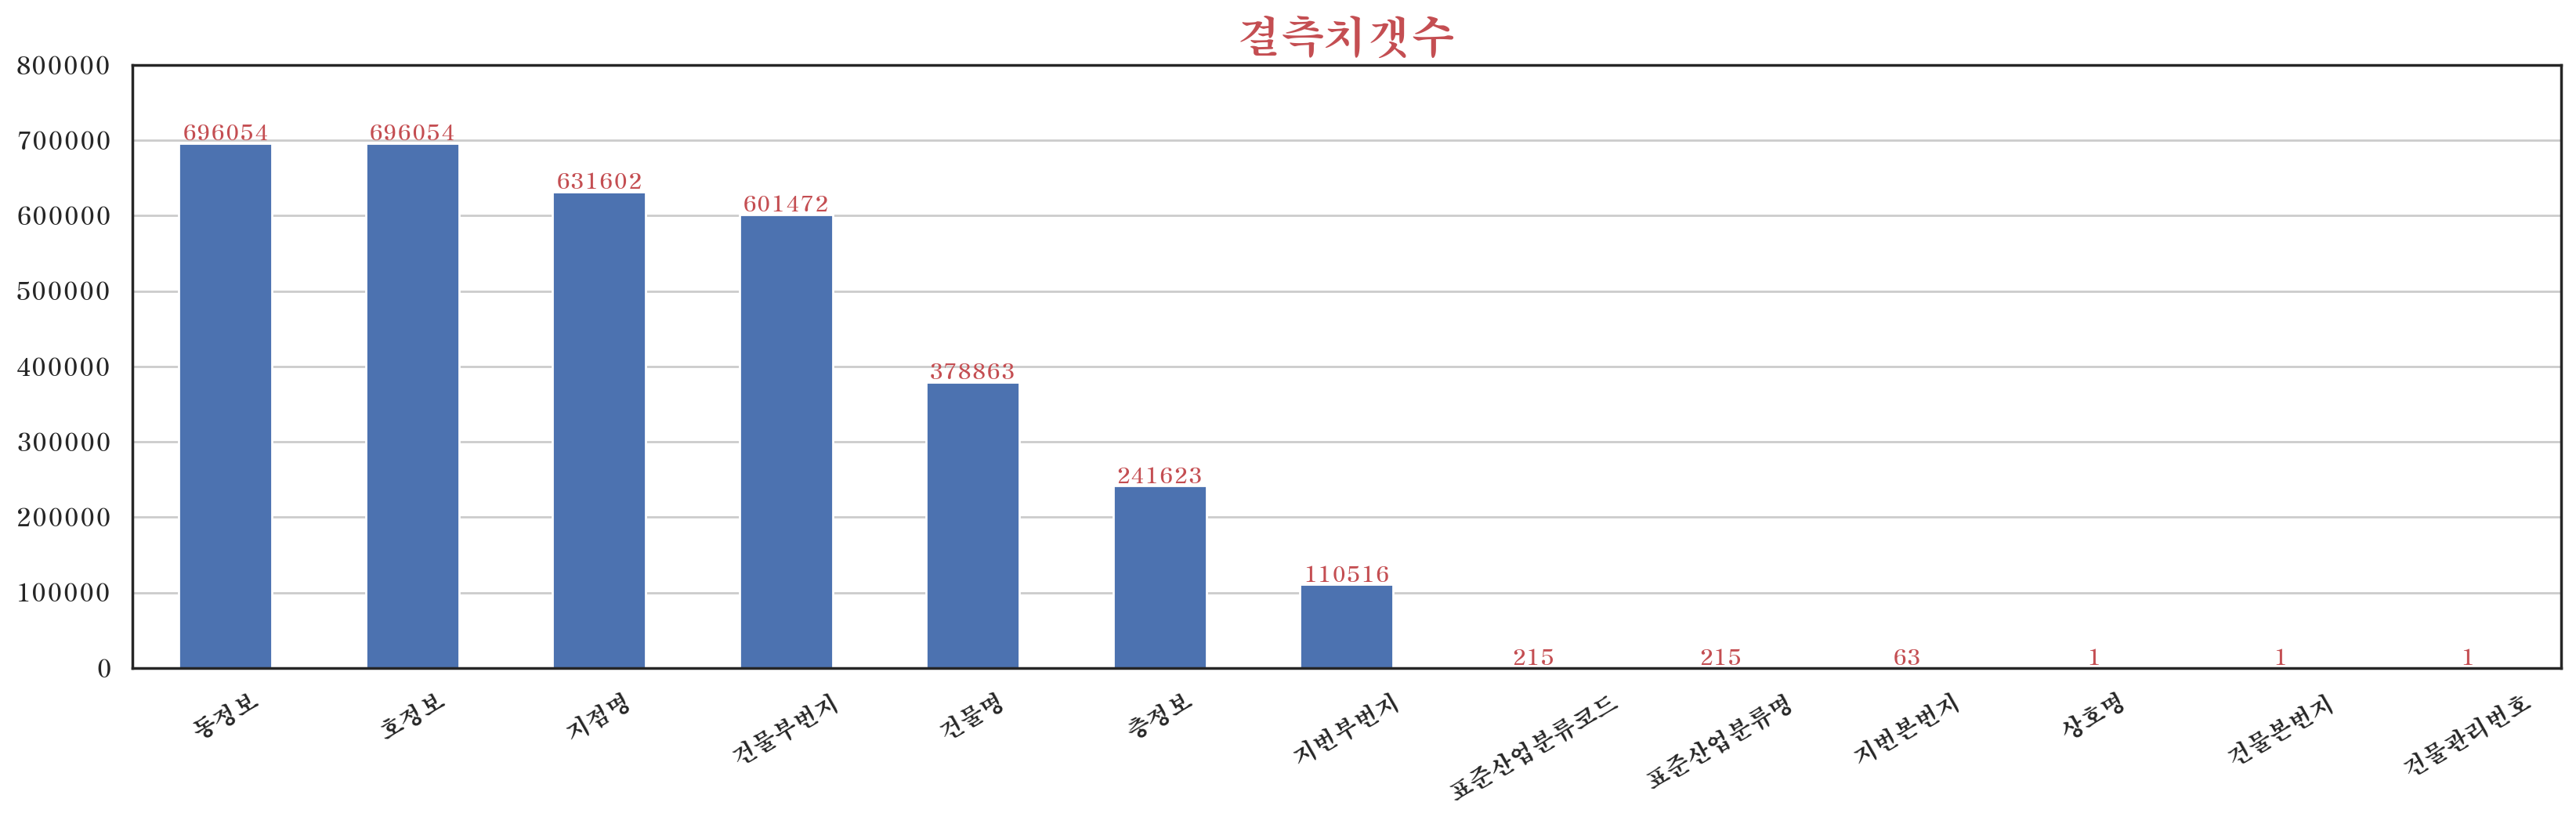

In [48]:
only_missing_cnt_srtd = only_missing_cnt.sort_values(ascending=False)
only_missing_cnt_srtd.plot.bar(rot=30, ylim=[0,800000])
plt.grid(axis='y')
for idx, val in enumerate(only_missing_cnt_srtd):
    plt.text(idx,val,val, size=10, color='r', weight='bold', va='bottom', ha='center')
plt.title('결측치갯수', color='r', fontsize=20, weight='bold')

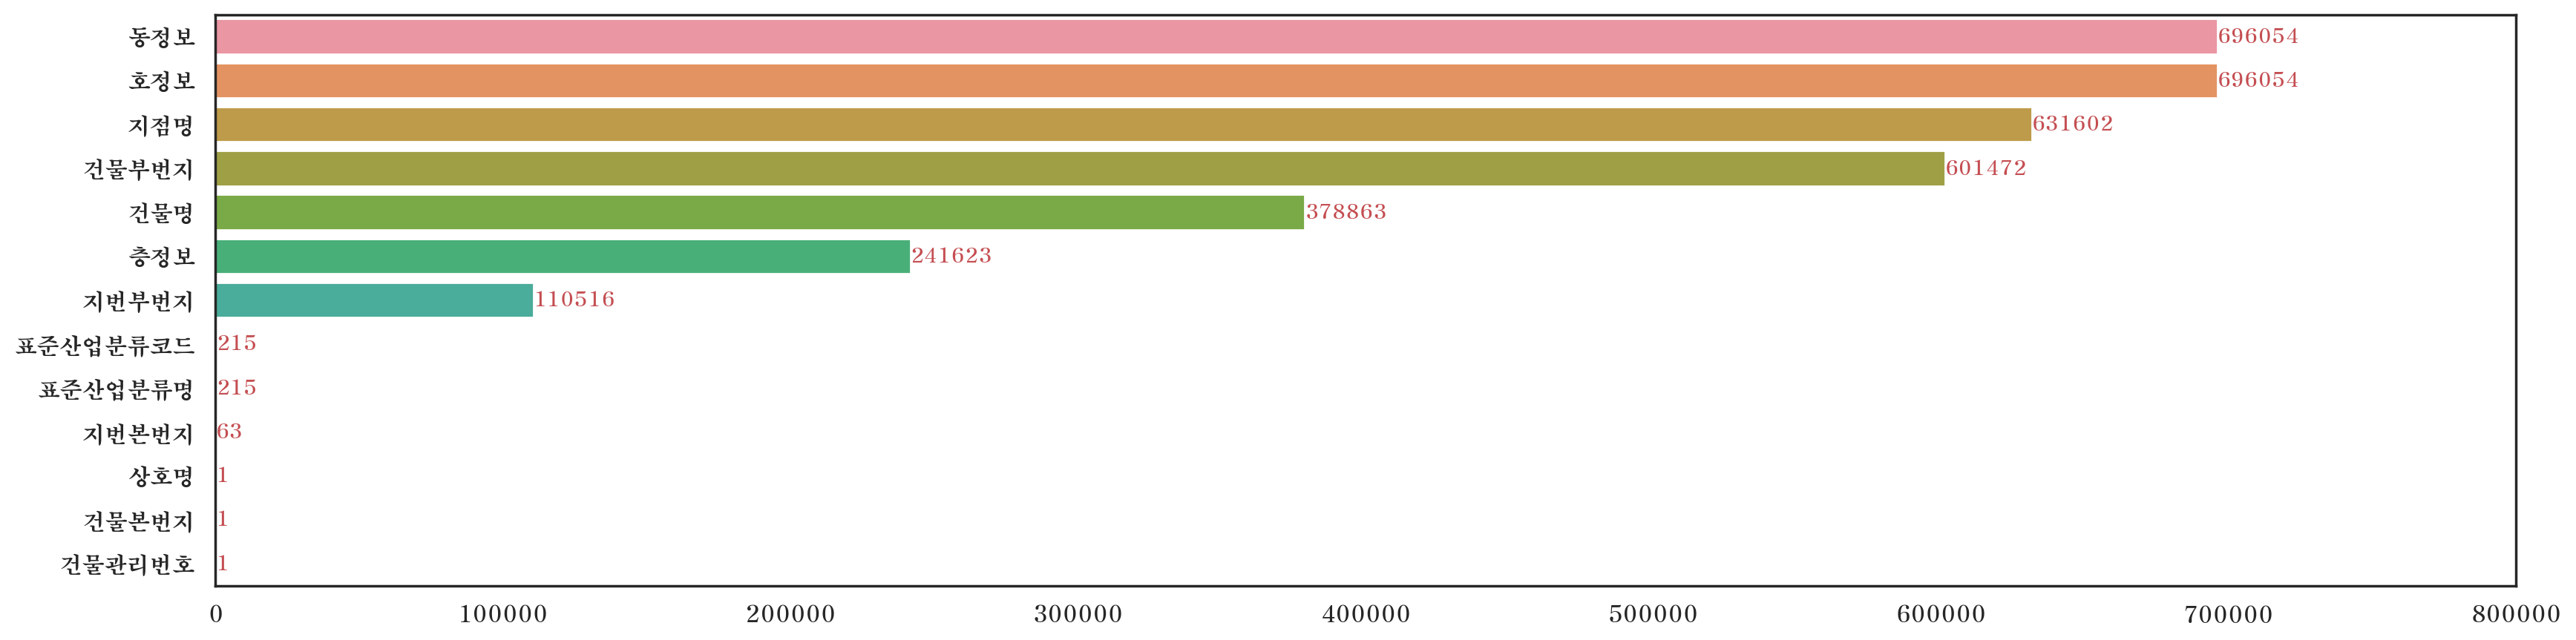

In [71]:
g=sns.barplot(y=only_missing_cnt_srtd.index, x=only_missing_cnt_srtd)
for idx, val in enumerate(only_missing_cnt_srtd):
    plt.text(val,idx,val, size=10, color='r', weight='bold', va='center', ha='left')
g.set_xlim([0,800000])   # or plt.ylim([0,800000]) 
plt.show()

# 4.	df 데이터 셋에서 사용하지 않을 컬럼은 제거
## ①	결측치가 너무 많은 컬럼은 제거한다. 결측치가 너무 많은 상위 9개 컬럼은 제거함

In [52]:
not_use = df.isna().sum().sort_values(ascending=False).head(9)
not_use.index

Index(['호정보', '동정보', '지점명', '건물부번지', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [55]:
# 컬럼 삭제 전 메모리 사용량 : ?
print('컬럼 제거전 shape :', df.shape)
df.drop(not_use.index, axis=1, inplace=True)
print('컬럼 제거후 shape :', df.shape)

컬럼 제거전 shape : (696054, 39)
컬럼 제거후 shape : (696054, 30)


## ②	컬럼명에 “코드”나 “번호”가 있는 컬럼은 분석에 사용되지 않을 예정입니다. 제거함

In [57]:
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [59]:
# 코드나 번호가 포함된 컬럼명
cols[(cols.str.find('코드')!=-1) | (cols.str.find('번호')!=-1)]

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [61]:
# 코드나 번호가 포함된 컬럼명
drop_col = cols[cols.str.contains('코드|번호')]
drop_col

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [62]:
# 컬럼 삭제 전 메모리 사용량 : ?
print('컬럼 제거전 shape :', df.shape)
df.drop(drop_col, axis=1, inplace=True)
print('컬럼 제거후 shape :', df.shape)

컬럼 제거전 shape : (696054, 30)
컬럼 제거후 shape : (696054, 16)


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       696053 non-null  object 
 1   상권업종대분류명  696054 non-null  object 
 2   상권업종중분류명  696054 non-null  object 
 3   상권업종소분류명  696054 non-null  object 
 4   시도명       696054 non-null  object 
 5   시군구명      696054 non-null  object 
 6   행정동명      696054 non-null  object 
 7   법정동명      696054 non-null  object 
 8   대지구분명     696054 non-null  object 
 9   지번본번지     695991 non-null  float64
 10  지번주소      696054 non-null  object 
 11  도로명       696054 non-null  object 
 12  건물본번지     696053 non-null  float64
 13  도로명주소     696054 non-null  object 
 14  경도        696054 non-null  float64
 15  위도        696054 non-null  float64
dtypes: float64(4), object(12)
memory usage: 85.0+ MB


## ※ df 파일 io ※

In [65]:
df.to_csv('C:/ai_x/download/shareData/상가정보_20250331/서울부산상가정보(결측등제거).csv', index=False)

In [ ]:
# df = pd.read_csv('C:/ai_x/download/shareData/상가정보_20250331/서울부산상가정보(결측등제거).csv')

# 5.	df 데이터 셋의 값을 가져온다(loc함수, iloc함수등을 사용하기도 하고 사용하지 않기도 하며 서브셋을 가져온다)
## ①	상호명 필드만 가져온다

In [68]:
#df['상호명'] # 시리즈
df[['상호명']] # 데이터프레임
df.loc[:, ['상호명']]

,상호명
0,부동산임대김은숙
1,한국황토건축연구소
2,소망공인중개사사무소
3,고향집
4,보석나라
...,...
696049,포마크파티룸
696050,정옥농장
696051,지안영어교습소
696052,히어로스포츠


## ②	상호명의 종류별 데이터수를 가져온다(df.상호명.value_counts()이용)

In [77]:
df['상호명'].value_counts()

컴퓨터수리         576
입시·교과학원       351
입주청소          308
김밥천국          232
현대공인중개사사무소    195
             ... 
오오토리            1
이천산업            1
미가뷰티            1
가산문고            1
지안영어교습소         1
Name: 상호명, Length: 535747, dtype: int64

In [78]:
df.groupby('상호명')['시군구명'].count().sort_values(ascending=False)

상호명
컴퓨터수리                  576
입시·교과학원                351
입주청소                   308
김밥천국                   232
현대공인중개사사무소             195
                      ... 
본푸드서비스삼표점주               1
본푸드서비스본우리집밥이마트수서점        1
본푸드서비스본우리집밥본그룹본사점        1
본푸드서비스본우리집밥대치위담한방병원      1
［주］세일캠퍼스                 1
Name: 시군구명, Length: 535747, dtype: int64

In [74]:
df.groupby('상호명')['위도'].count()

상호명
!아지트           1
&지헤어           1
&헤어            1
'S             1
'n'hairshop    1
              ..
９９세탁소          1
９９양행           1
；건축사사무소정인건축    1
ＧＳ２５길음동부       1
［주］세일캠퍼스       1
Name: 위도, Length: 535747, dtype: int64

In [73]:
# 결측치가 없는 컬럼 확인
df.isna().sum()

상호명          1
상권업종대분류명     0
상권업종중분류명     0
상권업종소분류명     0
시도명          0
시군구명         0
행정동명         0
법정동명         0
대지구분명        0
지번본번지       63
지번주소         0
도로명          0
건물본번지        1
도로명주소        0
경도           0
위도           0
dtype: int64

## ③	“상호명”과 "도로명주소” 컬럼 가져오기

In [81]:
df.loc[df.상호명=='김밥천국', ['상호명','도로명주소']]
df[ ['상호명','도로명주소']]

,상호명,도로명주소
0,부동산임대김은숙,서울특별시 종로구 삼청로 122-1
1,한국황토건축연구소,서울특별시 서초구 서초대로73길 40
2,소망공인중개사사무소,서울특별시 성동구 용답중앙15길 18
3,고향집,서울특별시 종로구 돈화문로4길 30
4,보석나라,서울특별시 구로구 개봉로3길 23
...,...,...
696049,포마크파티룸,부산광역시 부산진구 중앙대로 763-1
696050,정옥농장,부산광역시 기장군 장안읍 오리길 69-12
696051,지안영어교습소,부산광역시 해운대구 세실로 31
696052,히어로스포츠,부산광역시 사상구 가야대로366번길 22


## ④	0~2행을 출력하라 (head()함수를 이용하지 않고, loc과 iloc을 이용)

In [82]:
df.loc[0:2]
df.iloc[0:3]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,부동산임대김은숙,음식,비알코올,카페,서울특별시,종로구,삼청동,삼청동,대지,28.0,서울특별시 종로구 삼청동 28-21,서울특별시 종로구 삼청로,122.0,서울특별시 종로구 삼청로 122-1,126.981840,37.586250
1,한국황토건축연구소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,서초구,서초4동,서초동,대지,1308.0,서울특별시 서초구 서초동 1308-25,서울특별시 서초구 서초대로73길,40.0,서울특별시 서초구 서초대로73길 40,127.024563,37.500924
2,소망공인중개사사무소,부동산,부동산 서비스,부동산 중개/대리업,서울특별시,성동구,용답동,용답동,대지,4.0,서울특별시 성동구 용답동 4-11,서울특별시 성동구 용답중앙15길,18.0,서울특별시 성동구 용답중앙15길 18,127.054262,37.564786


# 6.	기술 통계값 보기 

- [Descriptive statistics - Wikipedia](https://en.wikipedia.org/wiki/Descriptive_statistics)
- [Computations / descriptive stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)
- [표준 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/표준편차)
* describe()를 사용하면 데이터 요약을 볼 수 있음(기술통계량)
    - 기본적으로 수치형 데이터를 요약
    - include, exclude 옵션으로 다른 데이터 타입의 요약 수치 출력
    - count, min, max, mean, median, 1사분위수, 3사분위수

### **개별 기술 통계값 구하기**

* [Computations / descriptive stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)
* count : 결측치를 제외한 값 갯수
* min, max: 최솟값, 최댓값
* argmin, argmax : 최솟값 인덱스, 최댓값 인덱스 반환
* quantile 특정 사분위수에 해당하는 값을 반환 (0~1 사이)
    * 0.25 : 1사분위 수
    * 0.5 : 2사분위수 (quantile 의 기본 값)
    * 0.75 : 3사분위수
* sum 수치 데이터의 합계
* mean 평균
* median 중앙값(중간값:데이터를 한 줄로 세웠을 때 가운데 위치하는 값, 중앙값이 짝수일 때는 가운데 2개 값의 평균을 구함)

* std, var 표준편차, 분산을 계산
* cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0 번째 부터 계속 더해짐)
* cumprod 맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1 번째 부터 계속 곱해짐)
* cov, corr() : 공분산, 상관계수
* skew 왜도 (오른쪽으로 치우침= 왜도<0, 왼쪽으로 치우침=왜도>0)
* kurt 첨도

## ①	df 데이터셋의 요약기술 통계량

In [83]:
df.describe() # 수치형 컬럼에 대한 기술 통계량

,지번본번지,건물본번지,경도,위도
count,695991.000000,696053.000000,696054.000000,696054.000000
mean,480.607357,143.589911,127.455853,37.009921
std,512.914069,263.204012,0.866655,0.990450
min,1.000000,1.000000,126.768186,34.989747
25%,111.000000,19.000000,126.943200,37.474714
50%,335.000000,47.000000,127.034361,37.514521
75%,684.000000,152.000000,127.130725,37.560269
max,6435.000000,3646.000000,129.292220,37.692604


In [86]:
df.describe(include='object').T # object형에 대한 기술 통계량 : 최빈값, 최빈값개, 데이터종류개수, 데이터개수

,count,unique,top,freq
상호명,696053,535747,컴퓨터수리,576
상권업종대분류명,696054,10,음식,193508
상권업종중분류명,696054,75,한식,71670
상권업종소분류명,696054,247,백반/한정식,34283
시도명,696054,2,서울특별시,540517
시군구명,696054,39,강남구,64716
행정동명,696054,628,역삼1동,13655
법정동명,696054,647,서초동,18140
대지구분명,696054,2,대지,695225
지번주소,696054,220969,서울특별시 송파구 문정동 634,938


In [90]:
df.describe(exclude=['object','int64']).round() # object형을 제외한 기술 통계량 

,지번본번지,건물본번지,경도,위도
count,695991.0,696053.0,696054.0,696054.0
mean,481.0,144.0,127.0,37.0
std,513.0,263.0,1.0,1.0
min,1.0,1.0,127.0,35.0
25%,111.0,19.0,127.0,37.0
50%,335.0,47.0,127.0,38.0
75%,684.0,152.0,127.0,38.0
max,6435.0,3646.0,129.0,38.0


In [93]:
# object형의 기술통계량 df.describe(include='object')
# objecjt형의 데이터
df.select_dtypes('object').head(1).T

,0
상호명,부동산임대김은숙
상권업종대분류명,음식
상권업종중분류명,비알코올
상권업종소분류명,카페
시도명,서울특별시
시군구명,종로구
행정동명,삼청동
법정동명,삼청동
대지구분명,대지
지번주소,서울특별시 종로구 삼청동 28-21


## ②	df 데이터셋의 “지번본번지", "건물본번지” 컬럼의 데이터 개수와  dtype 메모리 사용량을 확인한다

In [94]:
df[['지번본번지','건물본번지']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지번본번지   695991 non-null  float64
 1   건물본번지   696053 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


## ③	“위도", "경도” 컬럼만의 요약 기술통계량

In [99]:
df[['위도','경도']].describe().round()

,위도,경도
count,696054.0,696054.0
mean,37.0,127.0
std,1.0,1.0
min,35.0,127.0
25%,37.0,127.0
50%,38.0,127.0
75%,38.0,127.0
max,38.0,129.0


# 7.	단별량 수치형 변수 시각화
## ①	위도의 빈도표를 시각화 : plot.hist, hist, sns.displot, sns.histplot

<Axes: ylabel='Frequency'>

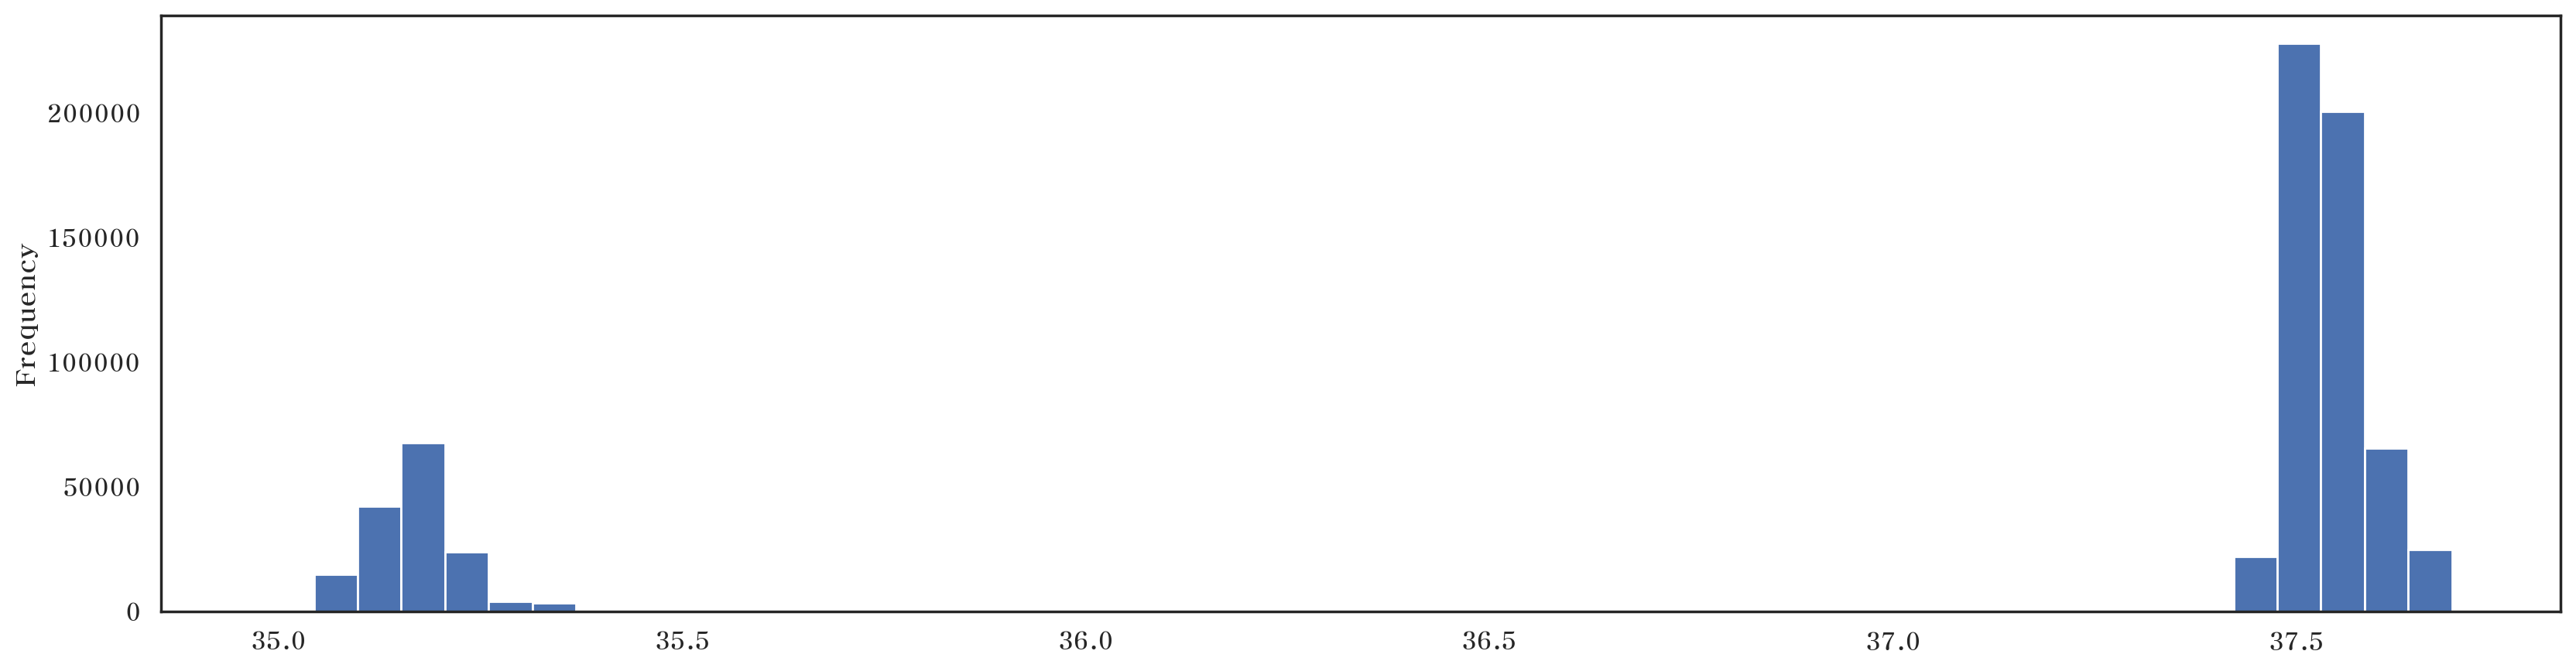

In [101]:
df['위도'].plot.hist(bins=50)

<Axes: >

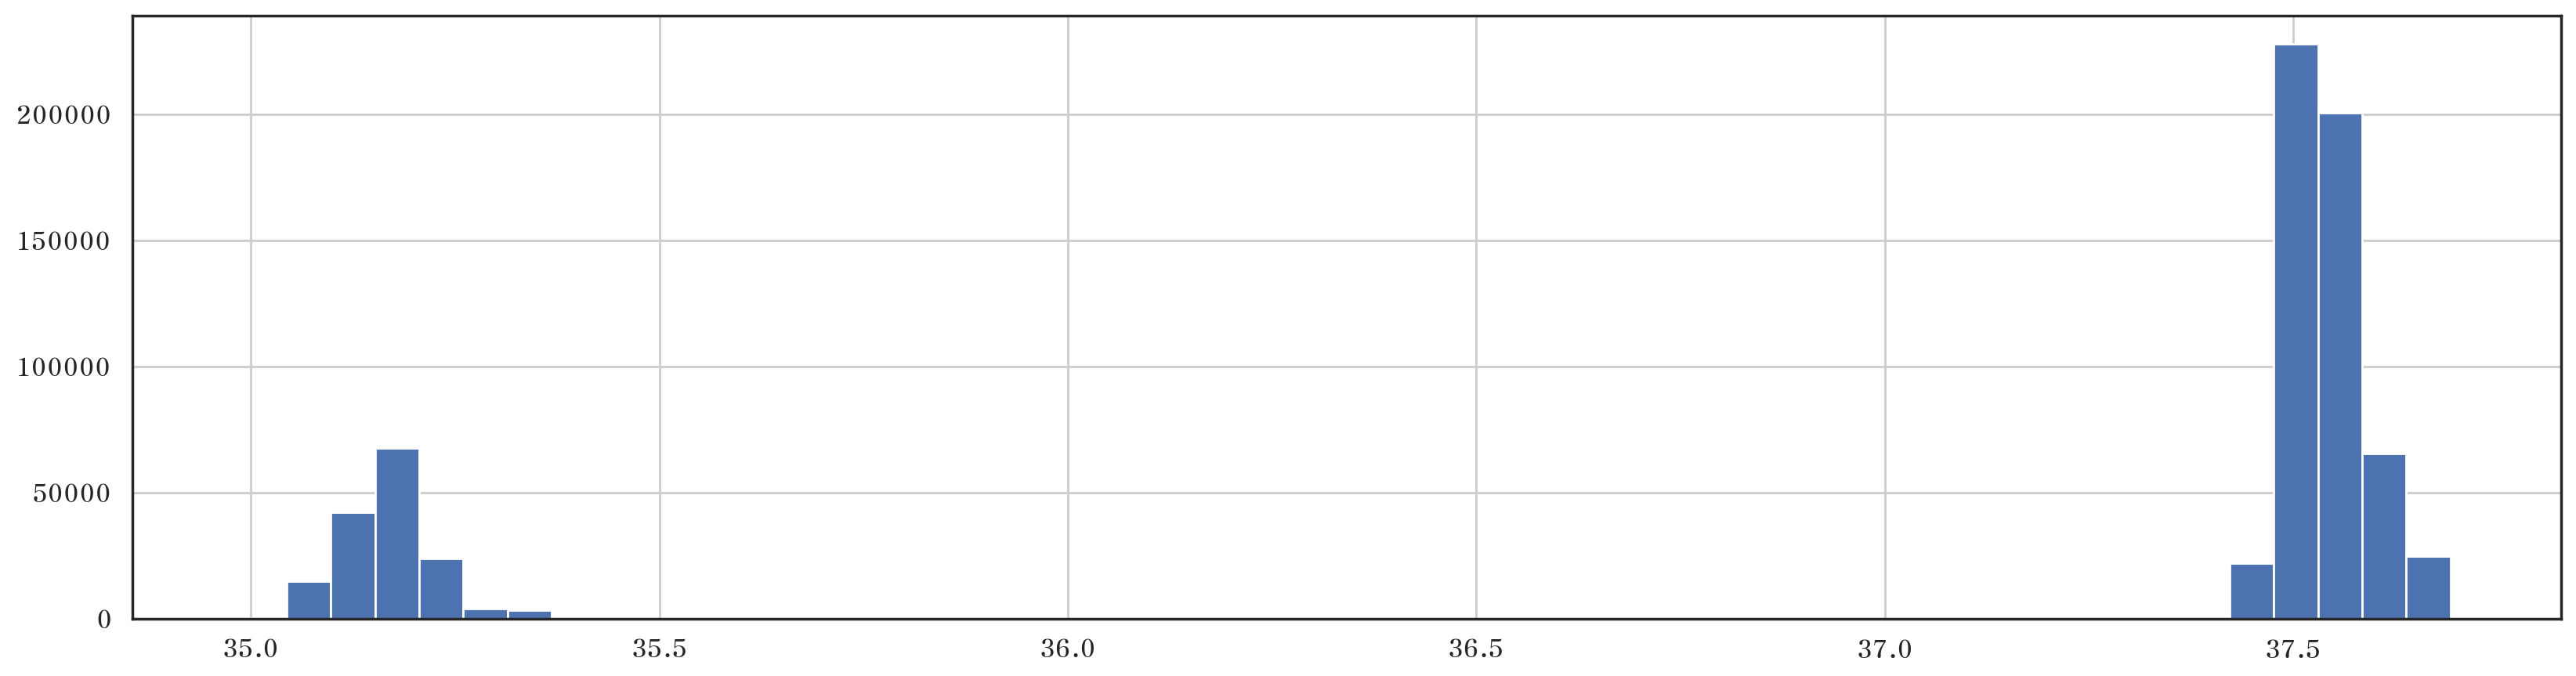

In [102]:
df['위도'].hist(bins=50)

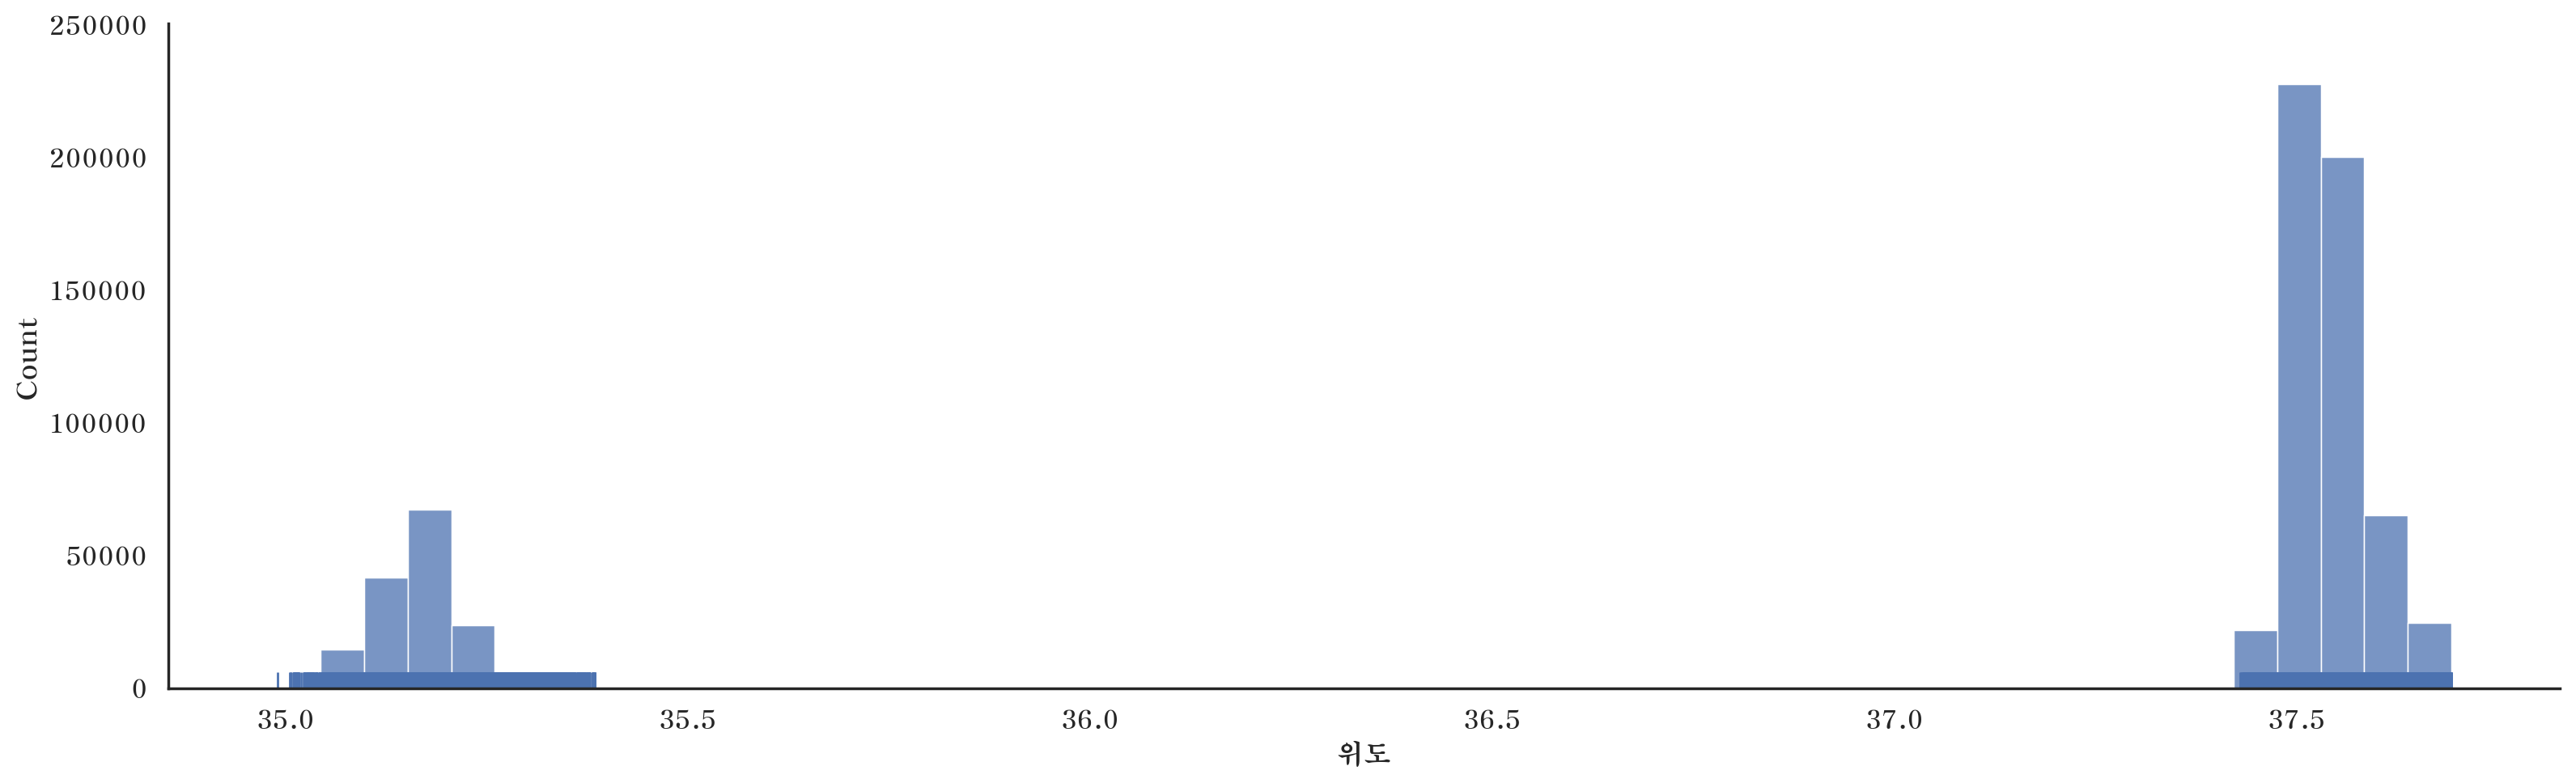

In [110]:
g = sns.displot(data=df, x='위도', bins=50, rug=True)
g.fig.set_size_inches(20,5)
plt.show()

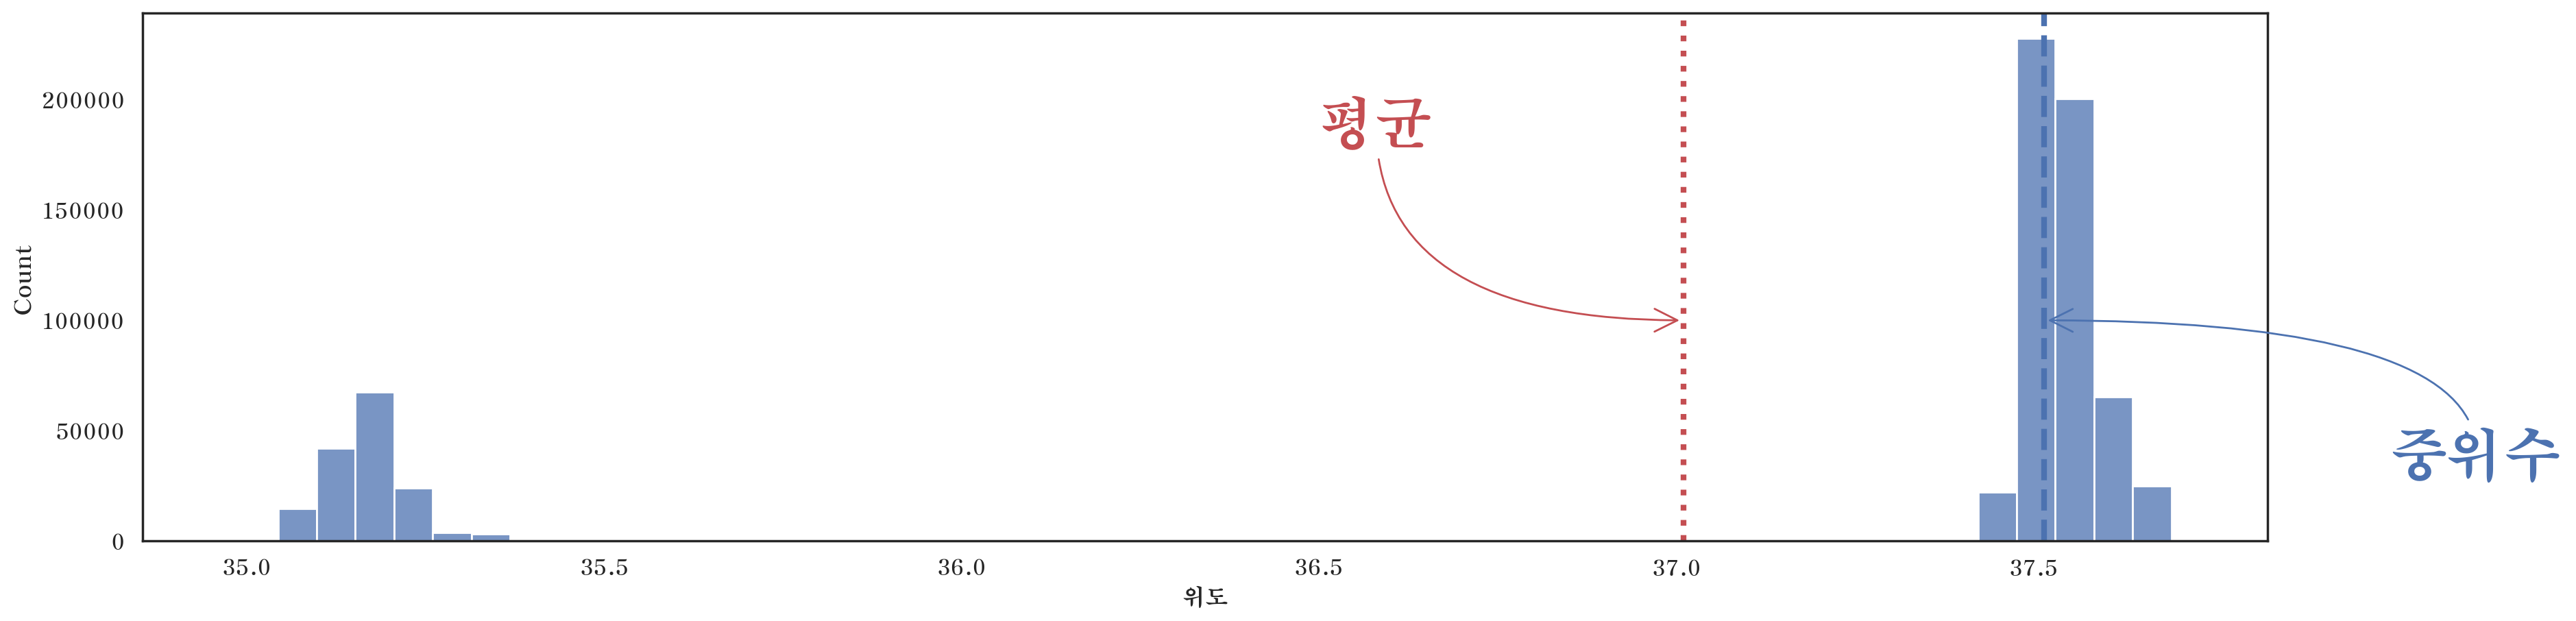

In [136]:
sns.histplot(data=df, x='위도', bins=50)
plt.axvline(df['위도'].mean(), color='r', linestyle=':', linewidth=3)
plt.annotate('평균',
             xytext=(36.5, 180000), # 글자 좌표
             xy = (df['위도'].mean(), 100000), # 화살표가 가리킬 좌표
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='angle3',
                             color='r'),
             fontsize=30,
             color='r'
            )
plt.axvline(df['위도'].median(), color='b', linestyle='--', linewidth=3)
plt.annotate('중위수',
             xytext=(38, 30000), # 글자 좌표
             xy = (df['위도'].median(), 100000), # 화살표가 가리킬 좌표
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='angle3',
                             color='b'),
             fontsize=30,
             color='b'
            )
plt.show()

In [116]:
# 왜도 : 평균을 기준으로 치우친 정도
# 오른쪽으로 치우침 : 왜도가 음수, 평균 < 중위수
# 왼쪽으로 치우침 : 왜도가 양수, 중위수 < 평균
df['위도'].skew() #, df['위도'].kurt()

-1.3235077358631402

Text(126.8, 130000, '중위수')

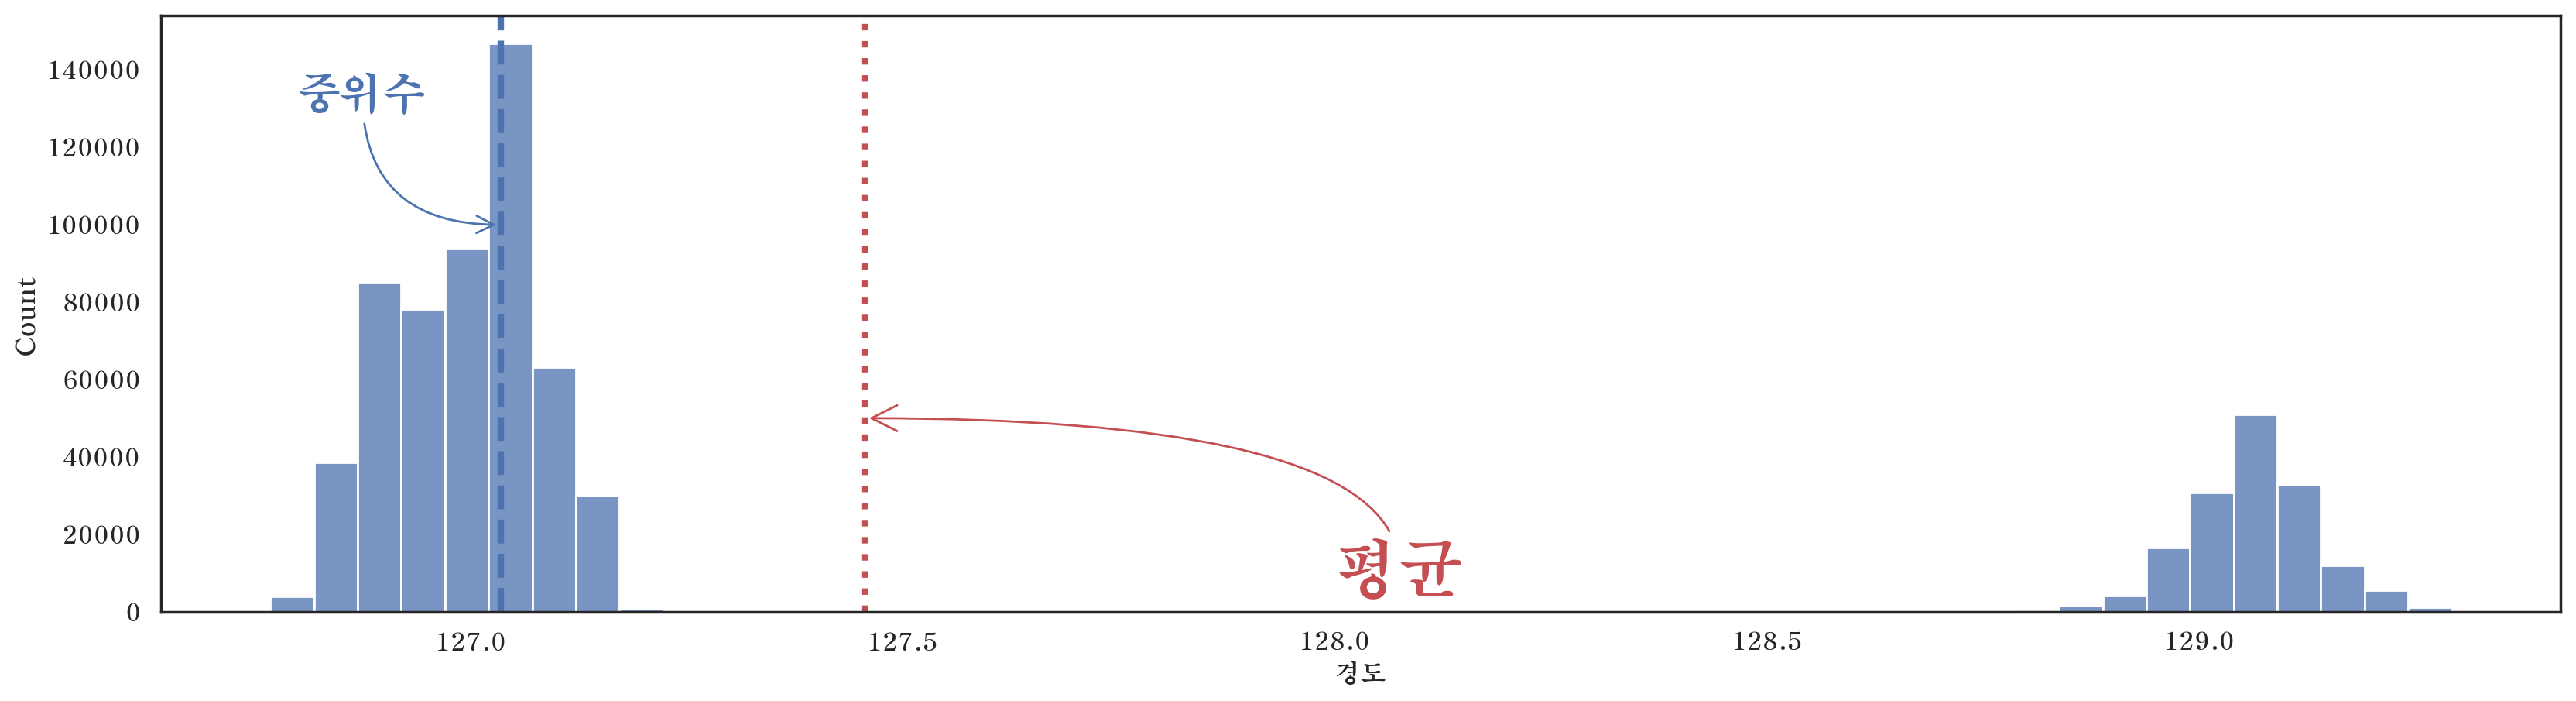

In [134]:
sns.histplot(data=df, x='경도', bins=50)
plt.axvline(df['경도'].mean(), color='r', linestyle=':', linewidth=3)
plt.annotate('평균',
             xytext=(128, 5000), # 글자 좌표
             xy = (df['경도'].mean(), 50000), # 화살표가 가리킬 좌표
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='angle3',
                             color='r'),
             fontsize=30,
             color='r'
            )
plt.axvline(df['경도'].median(), color='b', linestyle='--', linewidth=3)
plt.annotate('중위수',
             xytext=(126.8, 130000), # 글자 좌표
             xy = (df['경도'].median(), 100000), # 화살표가 가리킬 좌표
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='angle3',
                             color='b'),
             fontsize=20,
             color='b'
            )

# 8.	상관계수
-  두 변수 간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법
- [상관 분석 - 위키백과, 우리 모두의 백과사전M](https://ko.wikipedia.org/wiki/상관_분석) 

- 결과의 해석 : r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 결정계수(coefficient of determination)는 $r^2$로 계산하며 이것은 X 로부터 Y를 예측할 수 있는 정도를 의미한다.
- ([수학기호 사이트 참조](https://matplotlib.org/2.0.2/users/mathtext.html))

- 일반적으로
    * r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    * r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    * r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    * r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    * r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    * r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    * r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계로 해석한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/220px-Correlation_examples2.svg.png" width="600">

이미지 출처 : [위키백과](https://ko.wikipedia.org/wiki/상관_분석)

## ①	전체 숫자 컬럼끼리의 상관계수

In [137]:
corr = df.corr()
corr

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.057312,0.169355,-0.189570
건물본번지,0.057312,1.000000,-0.005815,0.012164
경도,0.169355,-0.005815,1.000000,-0.993565
위도,-0.189570,0.012164,-0.993565,1.000000


## ②	상관계수를 이용하여 heatmap 시각화
참조 http://seaborn.pydata.org/examples/many_pairwise_correlations.html


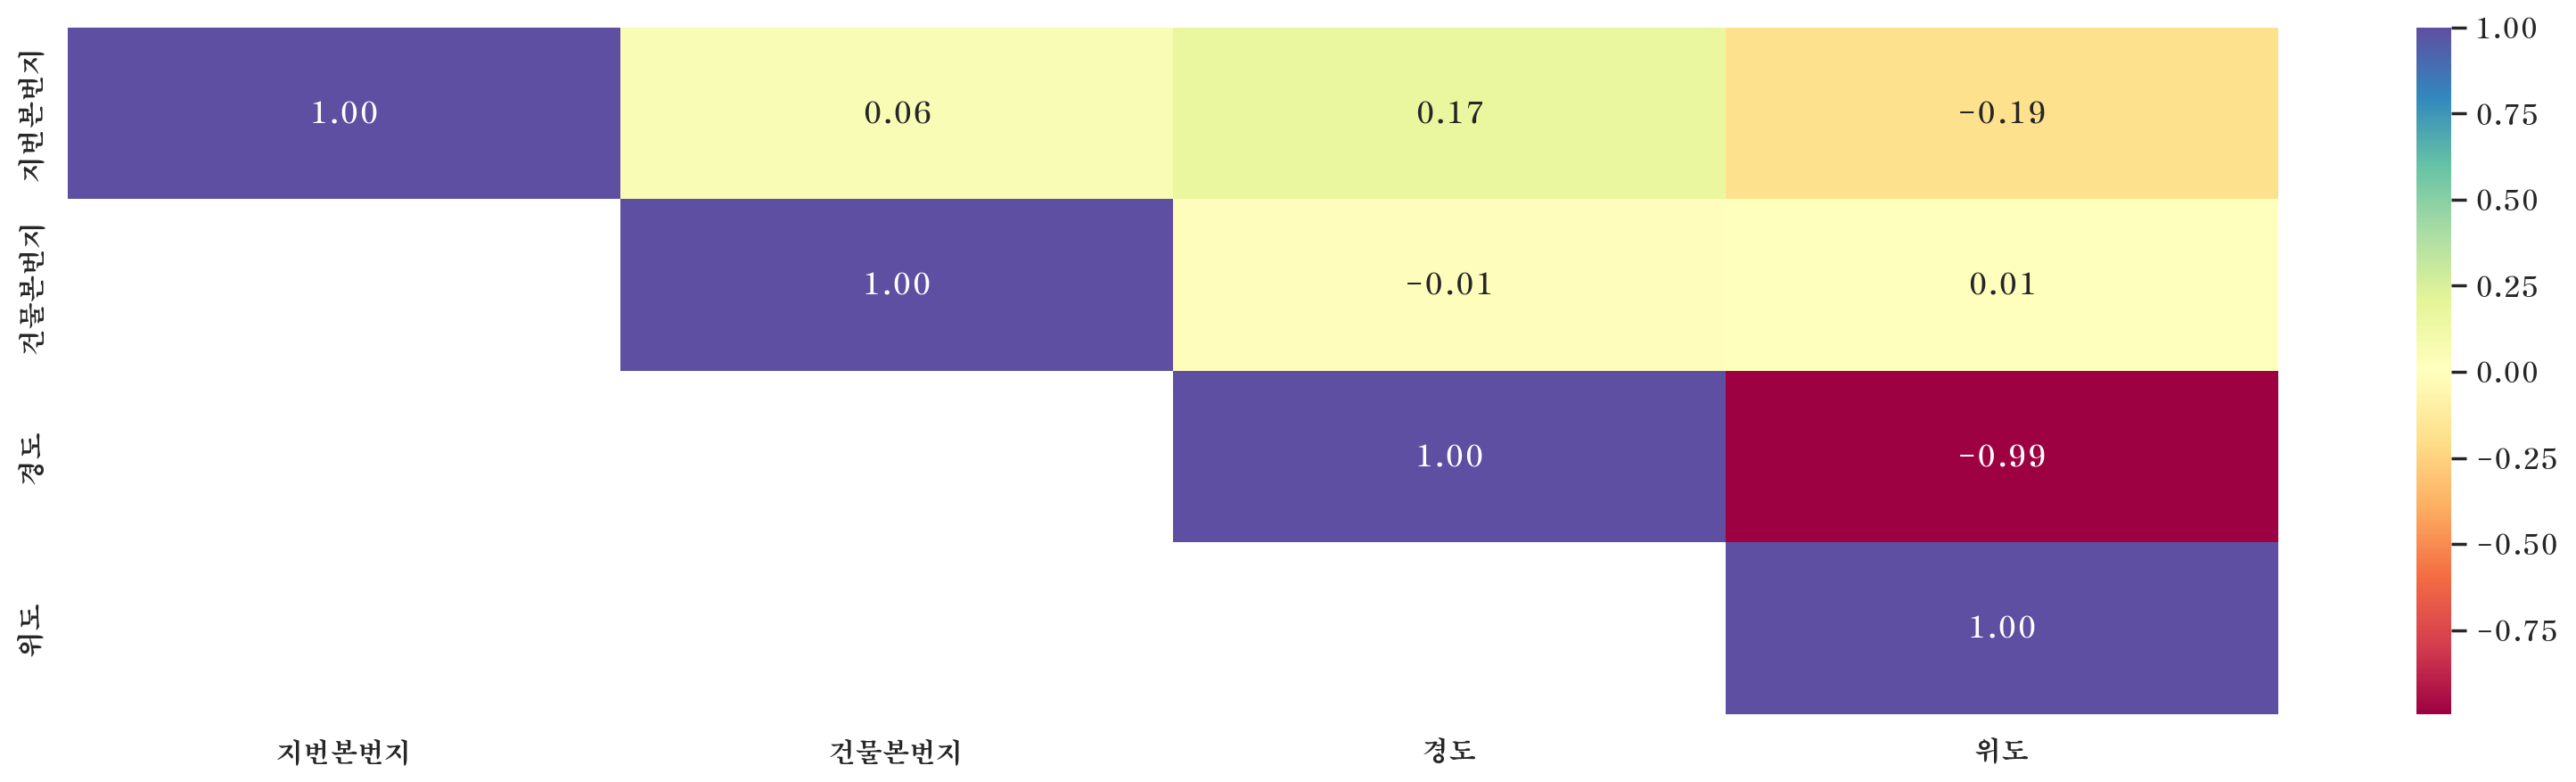

In [152]:
mask = np.triu(np.ones_like(corr, dtype=bool), k=0)

sns.heatmap(corr, annot=True, fmt='.2f', cmap='Spectral', mask=~mask)
plt.show()

In [142]:
a = np.array([[2.,1],
              [1,1]]) # 2행 2열짜리 배열
np.ones( (2,2), dtype=bool) # 매개변수에 온 구조의 배열에 1로

array([[ True,  True],
       [ True,  True]])

In [144]:
np.ones_like(a) # a변수와 구조가 같은 배열에 1로

array([[1., 1.],
       [1., 1.]])

In [145]:
temp = np.ones_like(corr, dtype=bool) # corr변수와 구조가 같은 배열에 1
temp

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [149]:
mask = np.triu(temp, k=1)

# 9.	경도와 위도 컬럼을 이용하여 산점도
Anscombe’s quartet — seaborn 0.10.0 documentation, 참조 http://seaborn.pydata.org/examples/many_pairwise_correlations.html

## ①	X축에는 경도, y축에는 위도 컬럼을 산점도로 시각화